## Случайные сигналы
## Автокорреляционная функция


Реакция системы $y[k] = \mathcal{H} \{ x[k]\}$ на случайный входной сигнал $x[k]$ является основой статистической обработки сигналов.

В дальнейшем предполагается, что статистические свойства входного сигнала $x[k]$ известны.

## Стационарность и эргодичность

Предположим, что входной сигнал $x[k]$ берется из стационарного случайного процесса. Согласно определению стационарности) должно выполняться следующее соотношение

\begin{equation}
E\{ f(x[k_1], x[k_2], \dots)\} = E\{ f(x[k_1 + \Delta], x[k_2 + \Delta], \dots)\}
\end{equation}

где $\Delta \ в \mathbb{Z}$ обозначает произвольный (временной) сдвиг, а $f(\cdot)$ - произвольную функцию отображения. Условие инвариантности системы по времени имеет вид

\begin{equation}
y[k + \Delta] = \mathcal{H} \{ x[k + \Delta]\}
\end{equation}

для $y[k] = \mathcal{H} \{ x[k]\}$. Применяя системный оператор $\mathcal{H}\{\cdot\}$ к левой и правой части определения стационарности для входного сигнала $x[k]$ и при линейности оператора ожидания $E\{\cdot\}$, получаем

\begin{equation}
E\{ g(y[k_1], y[k_2], \dots)\} = E\{ g(y[k_1 + \Delta], y[k_2 + \Delta], \dots)\}
\end{equation}
где $g(\cdot)$ обозначает произвольную функцию отображения, которая может отличаться от $f(\cdot)$.
Из приведенного уравнения можно сделать вывод, что выходной сигнал LTI-системы для стационарного входного сигнала также является стационарным. Аналогичные рассуждения можно применить и к эргодическому сигналу..

Обобщая, можно сказать, что для входного сигнала $x[k]$, который является

*  стационарным в широком смысле, выходной сигнал $y[k]$ является  стационарным, а входной и выходной сигнал совместно  стационарны
* (в широком смысле) эргодический, выходной сигнал $y[k]$ является (в широком смысле) эргодическим, а входной и выходной - совместно (в широком смысле) эргодическими.

Отсюда следует, что, например, для входного сигнала $x[k]$  такие меры, как автокорреляционная функция (АКФ), могут быть применены и к выходному сигналу $y[k] = \mathcal{H} \{ x[k]\}$ LTI-системы.

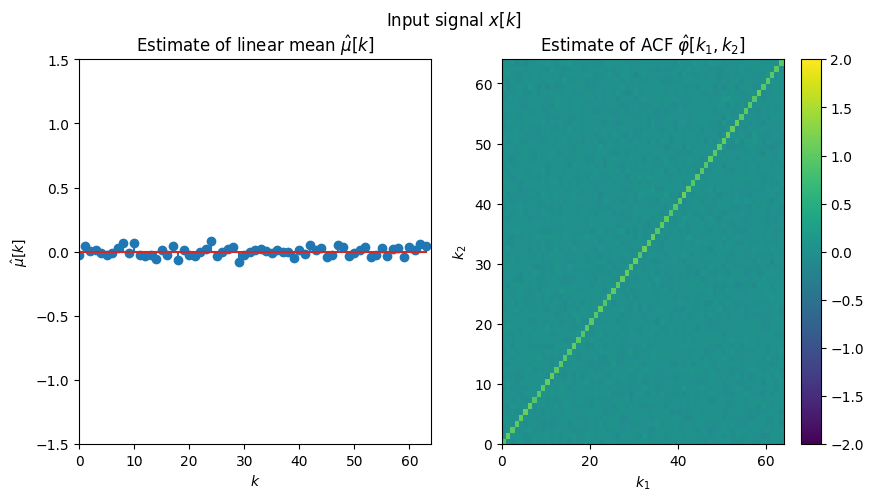

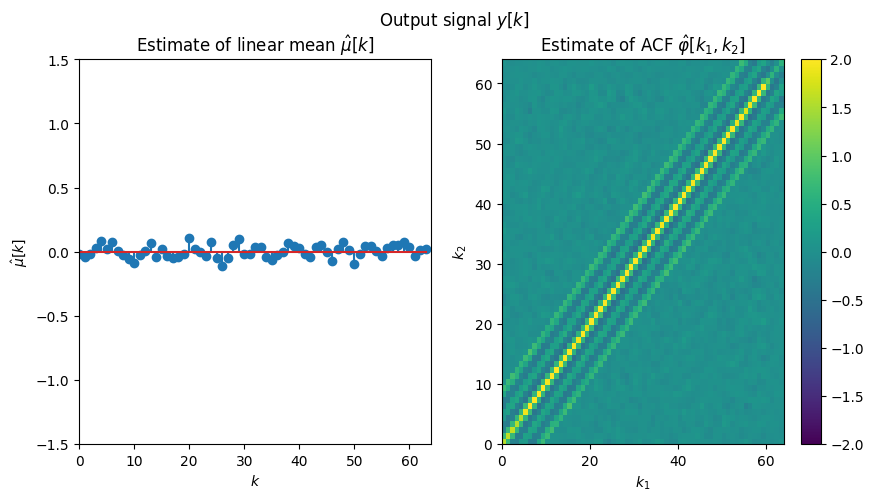

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L = 64  # number of random samples
N = 1000  # number of sample functions

# generate input signal (white Gaussian noise)
np.random.seed(1)
x = np.random.normal(size=(N, L))
# generate output signal
h = 2*np.fft.irfft([1, 1, 1, 0, 0, 0])
y = np.asarray([np.convolve(x[n, :], h, mode='same') for n in range(N)])


def compute_plot_results(x):
    '''Compute and plot linear mean and ACF'''

    # estimate linear mean by ensemble average
    mu = 1/N * np.sum(x, 0)
    # estimate the auto-correlation function
    acf = np.zeros((L, L))
    for n in range(L):
        for m in range(L):
            acf[n, m] = 1/N * np.sum(x[:, n]*x[:, m], 0)

    plt.subplot(121)
    plt.stem(mu)
    plt.title(r'Estimate of linear mean $\hat{\mu}[k]$')
    plt.xlabel(r'$k$')
    plt.ylabel(r'$\hat{\mu}[k]$')
    plt.axis([0, L, -1.5, 1.5])

    plt.subplot(122)
    plt.pcolor(np.arange(L+1), np.arange(L+1), acf, vmin=-2, vmax=2)
    plt.title(r'Estimate of ACF $\hat{\varphi}[k_1, k_2]$')
    plt.xlabel(r'$k_1$')
    plt.ylabel(r'$k_2$')
    plt.colorbar()
    plt.autoscale(tight=True)


plt.figure(figsize=(10, 5))
plt.gcf().suptitle(r'Input signal $x[k]$', fontsize=12)
compute_plot_results(x)

plt.figure(figsize=(10, 5))
plt.gcf().suptitle(r'Output signal $y[k]$', fontsize=12)
compute_plot_results(y)

### АКФ

Для непрерывного амплитудного вещественного случайного сигнала $x[k]$ АКФ определяется [средним по ансамблю второго порядка]  сигнала при  различных временных индексах $k_1$ и $k_2$

\begin{equation}
\varphi_{xx}[k_1, k_2] = E\{ x[k_1] \cdot x[k_2]\}.
\end{equation}

В предположении [ стационарности в широком смысле] АКФ зависит только от разности $\kappa = k_1 - k_2$ между рассматриваемыми выборочными индексами

\begin{equation}
\varphi_{xx}[\kappa] = E\{x[k] \cdot x[k-\kappa]\},
\end{equation}

где $\kappa$ обычно выбирается в качестве выборочного индекса вместо $k$ для того, чтобы показать, что он обозначает временной сдвиг/лаг. АКФ количественно оценивает сходство сигнала со сдвинутой версией самого себя.
Если процесс дополнительно является эргодическим в широком смысле, то АКФ может быть вычислена путем усреднения по одной выборочной функции

\begin{equation}
\varphi_{xx}[\kappa] = \lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k=-K}^{K} x[k]\cdot x[k-\kappa].
\end{equation}

Заметим, что в некоторых определениях АКФ нормализация в левой части суммы отбрасывается.  Для случайного сигнала $x_N[k] = \text{rect}_N[k] \cdot x[k]$ конечной длины $N$ и, используя свойства эргодического случайного процесса в широком смысле, получаем

\begin{equation}
\varphi_{xx}[\kappa] := \frac{1}{N} \sum_{k=0}^{N-1} x_N[k]\cdot x_N[k-\kappa] = \frac{1}{N} \; x_N[\kappa] * x_N[- \kappa],
\end{equation}

где АКФ $\varphi_{xx}[\kappa] = 0$ для $|\kappa| > N-1$. Следовательно, АКФ может быть вычислена путем (быстрой) свертки случайного сигнала со сдвигом во времени  самого себя.

Отметим, что в численных реализациях (например, MATLAB, Python с `mode='full'`) вычисленная АКФ хранится в векторе длины $2 N - 1$. Положительные индексы $0, 1, \dots, 2 N - 2$ этого вектора не могут быть непосредственно интерпретированы как $\kappa$.
Для интерпретации относительно реального временного лага $\kappa$ из этих индексов необходимо вычесть $N-1$.

Далее отметим, что усреднение по $\frac{1}{N}$ дает [смещенную оценку] АКФ, которую последовательно следует обозначать через $\hat{\varphi}_{xx,\mathrm{biased}}[\kappa]$.
Несмещенная оценка АКФ имеет вид
$$\hat{\varphi}_{xx,\mathrm{unbiased}}[\kappa] = \frac{1}{N-|\kappa|}\sum_{k=0}^{N-1} x_N[k] \cdot x_N[k-\kappa].$$

# ### Пример - Реакция линейной инварантной системы на случайный сигнал

В следующем примере вычисляются и строятся графики оценок линейного среднего $\mu[k]$ и автокорреляционной функции (АКФ) $\varphi[k_1, k_2]$ для входа и выхода LTI-системы. Входной сигнал $x[k]$ берется из нормально распределенного процесса с белым шумом.

### СВОЙСТВА


1. АКФ $\varphi_{xx}[\kappa]$ имеет максимум при $\kappa = 0$. Он имеет вид
    
    $$ \varphi_{xx}[0] = E\{x^2[k]\} = \sigma_x^2 + \mu_x^2 $$.
    
    Это связано с тем, что сигнал равен самому себе для $\kappa = 0$. Следует иметь в виду, что для периодических случайных сигналов будет присутствовать более одного максимума.
    
2. АКФ является функцией с четной симметрией
    
    $$ \varphi_{xx}[\kappa] = \varphi_{xx}[-\kappa] $$.
    
3. Для типичных случайных сигналов АКФ приближается к предельному значению
    
    $$ \lim_{|\kappa| \to \infty} \varphi_{xx}[\kappa] = \mu_x^2 $$.
    
4. АКФ периодического сигнала $x[k] = x[k + P]$ также является периодической

    $$ \varphi_{xx}[\kappa] = \varphi_{xx}[\kappa + P] $$
    
    с периодом $P \ в \mathbb{N} \setminus 0$.

Случайный сигнал $x[k]$ считается **некоррелированным**, если

\begin{equation}
\varphi_{xx}[\kappa] = \mu_x^2 + \sigma_x^2 \cdot \delta[\kappa],
\end{equation}

и  коррелированный, если это условие не выполняется. Образцы некоррелированного сигнала не имеют статистической зависимости друг от друга.

### АКФ периодического сигнала

Периодический сигнал $x[k]$ может быть выражен в виде

\begin{equation}
x[k] = x_0[k] * \sum_{n = - \infty}^{\infty} \delta[k - nP]
\end{equation}

где $x_0[k]$ обозначает сигнал одного периода. DTFT $X(\mathrm{e}^{\mathrm{j} \Omega})$ периодического сигнала состоит из серии равновероятных импульсов Дирака . Предположим, что $x_0[k]$ -  эргодический случайный сигнал. Выразив АКФ в виде свертки, преобразовав ее в частотную область с помощью DTFT и воспользовавшись свойством умножения дельта-функции Дирака, можно сделать вывод, что ее АКФ является периодической с периодом $P$. Тогда АКФ задается сверткой только по одному периоду  с
 периодическим продолжением в виде

\begin{equation}
\varphi_{xx}[\kappa] = \frac{1}{N} \left( x_0[\kappa] * x_0[-\kappa]\right) * \sum_{n = - \infty}^{\infty} \delta[k - nP].
\end{equation}

АКФ периодического сигнала вычисляется и строится следующим образом.

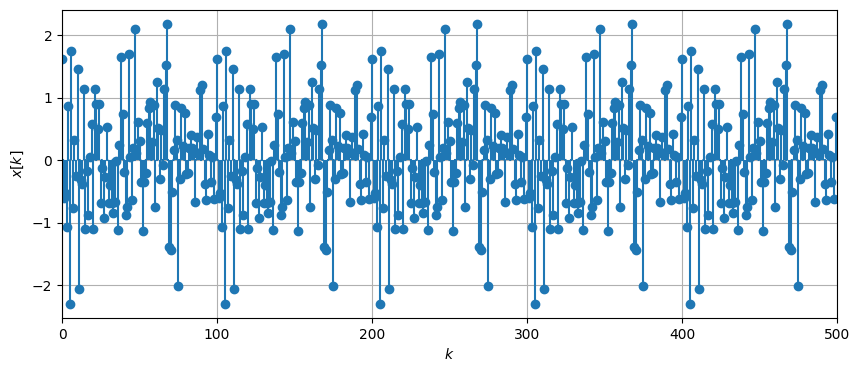

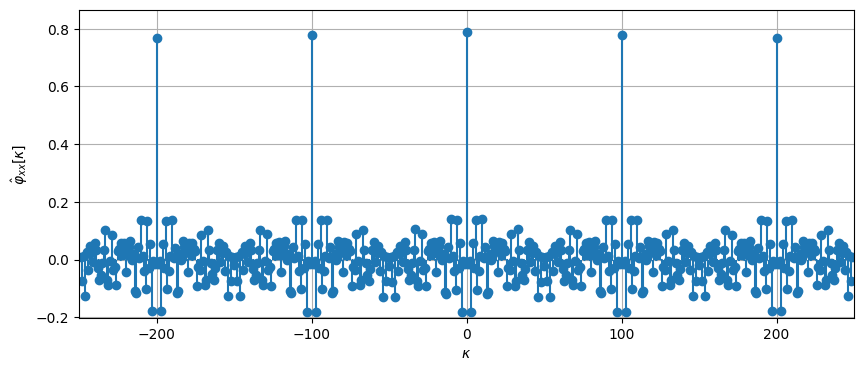

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 8000  # total length of signal
P = 100  # period
K = 250  # upper/lower limit for lag in ACF

# generate periodic random signal
np.random.seed(1)
x0 = np.random.normal(size=P)
x = np.tile(x0, N//P)

# compute and truncate ACF
acf = 1/len(x) * np.correlate(x, x, mode='full')
acf = acf[(len(x)-1)-(K-1):(len(x)-1)+K]
kappa = np.arange(-(K-1), K)

# plot signal and its ACF
plt.figure(figsize=(10, 4))
plt.stem(x[:2*K], basefmt='C0:')
plt.xlim(0, 2*K)
plt.xlabel(r'$k$')
plt.ylabel(r'$x[k]$')
plt.grid()

plt.figure(figsize=(10, 4))
plt.stem(kappa, acf, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\hat{\varphi}_{xx}[\kappa]$')
plt.axis([-K, K, 1.1*min(acf), 1.1*max(acf)])
plt.grid()

### Пример - оценка высоты тона аудио сигнала
Речевые сигналы представляют собой случайные сигналы с определенными статистическими свойствами, которые могут быть связаны с процессом их производства в голосовом тракте человека. Для создания вокала звук, производимый периодически вибрирующими голосовыми складками, фильтруется резонирующими объемами и артикуляторами, расположенными над голосовым аппаратом.

Вокал, улавливаемый микрофоном, генерирует, соответственно, сигнал, который в  приближении является периодическим. Основная частота периодического сигнала определяется обратной величиной времени его периода T0=Pfs , где fs - частота дискретизации. Алгоритмы определения высоты тона направлены на оценку индивидуальной основной частоты речи. Одним из распространенных методов является оценка среднего периода по периоду АКФ. В следующем примере оценивается и строится график АКФ записанного вокала "о". Для наглядности АКФ изображена в виде непрерывной линии.

In [ ]:
о

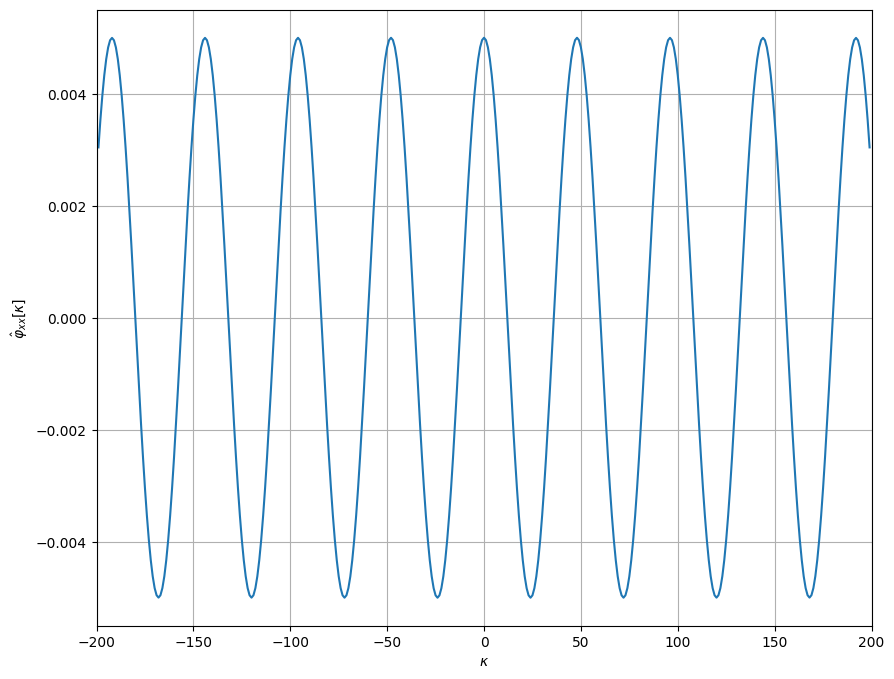

In [ ]:
from scipy.io import wavfile

K = 200  # upper/lower limit for lag in ACF

# read audio file
fs, x = wavfile.read('/content/drive/MyDrive/random_signals_cosine.wav')
# wav stored as 16Bit integer, convert it to float
x = np.asarray(x, dtype=float)/2**15

# compute and truncate ACF
acf = 1/len(x) * np.correlate(x, x, mode='full')
acf = acf[(len(x)-1)-(K-1):(len(x)-1)+K]
kappa = np.arange(-(K-1), K)

# plot ACF
plt.figure(figsize=(10, 8))
plt.plot(kappa, acf)
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\hat{\varphi}_{xx}[\kappa]$')
plt.axis([-K, K, 1.1*min(acf), 1.1*max(acf)])
plt.grid()

**Задание 1 **

1.Загрузите любой речевой сигнал

2 Оцените среднюю основную частоту $f_0$ речевого сигнала по его АКФ (частота дискретизации $f_\mathrm{s} кГц, период дискретизации $T_s = \frac{1}{f_s} = $ мс)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


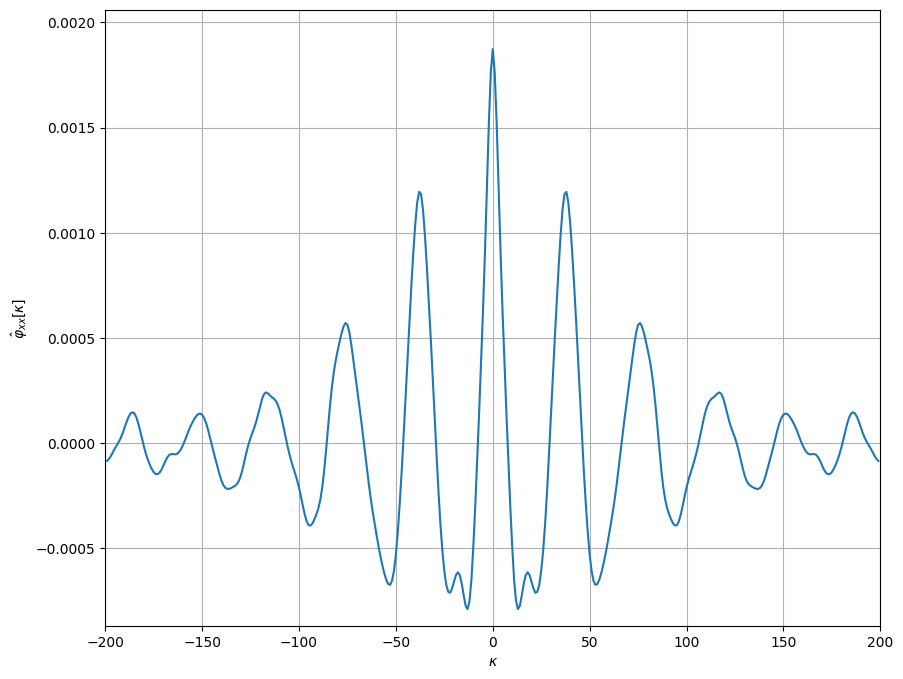

In [ ]:
from scipy.io import wavfile

K = 200  # upper/lower limit for lag in ACF
# read audio file
fs, x = wavfile.read('/content/drive/MyDrive/speech.wav')
# wav stored as 16Bit integer, convert it to float
x = np.asarray(x, dtype=float)/2**15

# compute and truncate ACF
acf = 1/len(x) * np.correlate(x, x, mode='full')
acf = acf[(len(x)-1)-(K-1):(len(x)-1)+K]
kappa = np.arange(-(K-1), K)

# plot ACF
plt.figure(figsize=(10, 8))
plt.plot(kappa, acf)
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\hat{\varphi}_{xx}[\kappa]$')
plt.axis([-K, K, 1.1*min(acf), 1.1*max(acf)])
plt.grid()

In [ ]:
L = 2**8  # length

# generate two uncorrelated random signals
np.random.seed(1)
x = 4 + np.random.normal(size=L//8)
y = 2.7 + np.random.normal(size=L)

# compute CCF
ccf = 1/len(x) * np.correlate(x, y, mode='full')  # biased estimator
kappa = np.arange(0, len(x)+len(y)-1) - (len(y)-1)
# ccf = L/(L-np.abs(kappa)) * ccf  # unbiased estimator, only if len(x)==len(y)

# print mean values of signals
print('Mean of signal x[k]: %3.2f' % np.mean(x))
print('Mean of signal y[k]: %3.2f' % np.mean(y))

# plot CCF
plt.figure(figsize=(10, 8))
plt.stem(kappa, ccf, basefmt='C0:', linefmt='C0:')
plt.title('Biased estimator of cross-correlation function, N=' +
          str(len(x))+', M='+str(len(y)))
plt.ylabel(r'$\hat{\varphi}_{xy}[\kappa]$')
plt.xlabel(r'$\kappa$')
plt.axis([kappa[0], kappa[-1], 0, 1.1*max(ccf)])
plt.grid()

## Взаимная корреляционная функция, или кросс-корреляционная функция (ККФ)
Взаимная корреляционная функция, или кросс-корреляционная функция (ККФ) определяется для двух стационарных временных рядов как коэффициент корреляции между xt и yt+k в зависимости от k



###
Для двух непрерывных по амплитуде вещественных случайных сигналов $x[k]$ и $y[k]$ ККФ определяется [средним значением по ансамблям второго порядка] (ensemble_averages.ipynb#Second-Order-Ensemble-Averages) при двух различных временных индексах $k_x$ и $k_y$

\begin{equation}
\varphi_{xy}[k_x, k_y] = E\{ x[k_x] \cdot y[k_y]\}.
\end{equation}

В предположении стационарного процесса в широком смысле ККФ зависит только от разности $\kappa = k_x - k_y$ между рассматриваемыми выборочными индексами

\begin{equation}
\varphi_{xy}[\kappa] = E\{x[k] \cdot y[k - \kappa]\} = E\{x[k + \kappa] \cdot y[k]\}.
\end{equation}

Кросс-корреляционная функция (ККФ) - это мера сходства двух случайных сигналов $x[k]$ и $y[k - \kappa]$ с учетом временного сдвига/задержки $\kappa \ в \mathbb{Z}$. Если $x[k]$ и $y[k]$ происходят из эргодических процессов в широким смысле, то ККФ можно вычислить путем усреднения по одной выборочной функции в виде

\begin{equation}
\varphi_{xy}[\kappa] = \lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k=-K}^{K} x[k]\cdot y[k-\kappa].
\end{equation}

Для случайных сигналов конечной длины $x_N[k] = \text{rect}_N[k] \cdot x[k]$ (приписывая $x$ длину $N$) и $y_M[k] = \text{rect}_M[k] \cdot y[k]$ (приписывая $y$ длину $M$) получаем

\begin{equation}
\varphi_{xy}[\kappa] := \frac{1}{N} \sum_{k=0}^{N-1} x_N[k] \cdot y_M[k-\kappa] = \frac{1}{N} \; x_N[\kappa] * y_M[- \kappa],
\end{equation}

где ККФ $\varphi_{xy}[\kappa] = 0$ для $\kappa < -(M-1)$ и $\kappa > N-1$. УУФ может быть вычислена путем (быстрой) свертки одного случайного сигнала с обращенной по времени версией другого случайного сигнала. Связь между линейной сверткой и кросс-корреляцией двух сигналов позволяет определить линейные инвариантные по времени (LTI) системы. В LTI-системе для формирования выходного сигнала входной сигнал коррелируется с импульсным откликом, обращенным во времени.

Если просто поменять местами $x$ и $y$ (т.е. $x$ имеет длину $M$, а $y$ - длину $N$), то результат будет отличаться как по временному выравниванию, так и по амплитудным значениям ККФ. Последнее связано с усреднением по $\frac{1}{N}$. ПРимер

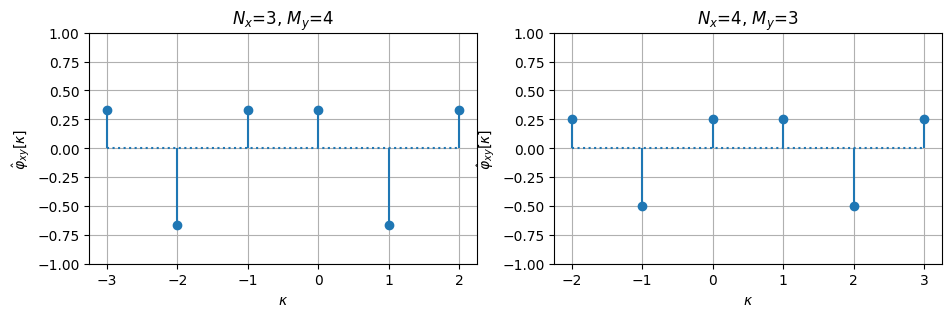

In [ ]:
plt.figure(figsize=(11, 3))

plt.subplot(1, 2, 1)  # case 1: x shorter than y
x = (1, -1, 1)
y = (1, -1, -1, 1)
N = len(x)
M = len(y)
xc1 = 1/N * np.correlate(x, y, mode='full')
kappa1 = np.arange(0, N+M-1) - (M-1)
plt.stem(kappa1, xc1, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\hat{\varphi}_{xy}[\kappa]$')
plt.title(r'$N_x$='+str(N)+', $M_y$='+str(M))
plt.ylim(-1, 1)
plt.grid(True)

plt.subplot(1, 2, 2)  # case 2: x longer than y
y, x = x, y  # elegant variable swap
N, M = M, N
xc2 = 1/N * np.correlate(x, y, mode='full')
kappa2 = np.arange(0, N+M-1) - (M-1)
plt.stem(kappa2, xc2, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\hat{\varphi}_{xy}[\kappa]$')
plt.title(r'$N_x$='+str(N)+', $M_y$='+str(M))
plt.ylim(-1, 1)
plt.grid(True)

### СВОЙСТВА
1.  ККФ симметрична

    $$ \varphi_{xy}[\kappa] = \varphi_{yx}[-\kappa] $$
    
2. Для типичных случайных процессов ККФ приближается к предельному значению

    $$ \lim_{|\kappa| \to \infty} \varphi_{xy}[\kappa] = \mu_x \cdot \mu_y$$.

Два случайных сигнала считаются **некоррелированными**, если
    
\begin{equation}
\varphi_{xy}[\kappa] = \mu_x \cdot \mu_y
\end{equation}

и коррелированными, если это условие не выполняется. Для двух некоррелированных друг с другом сигналов отсутствуют зависимостей в статистическом смысле. $\varphi_{xy}[\kappa] = 0$ для некоррелированных сигналов, если один из двух случайных процессов имеет нулевую среднюю.

### Пример -ККФ для двух случайных сигналов

График ККФ двух случайных сигналов $x[k]$ и $y[k]$ конечной длины $N$ и $M = 2 N$.

Mean of signal x[k]: 2.02
Mean of signal y[k]: 3.06


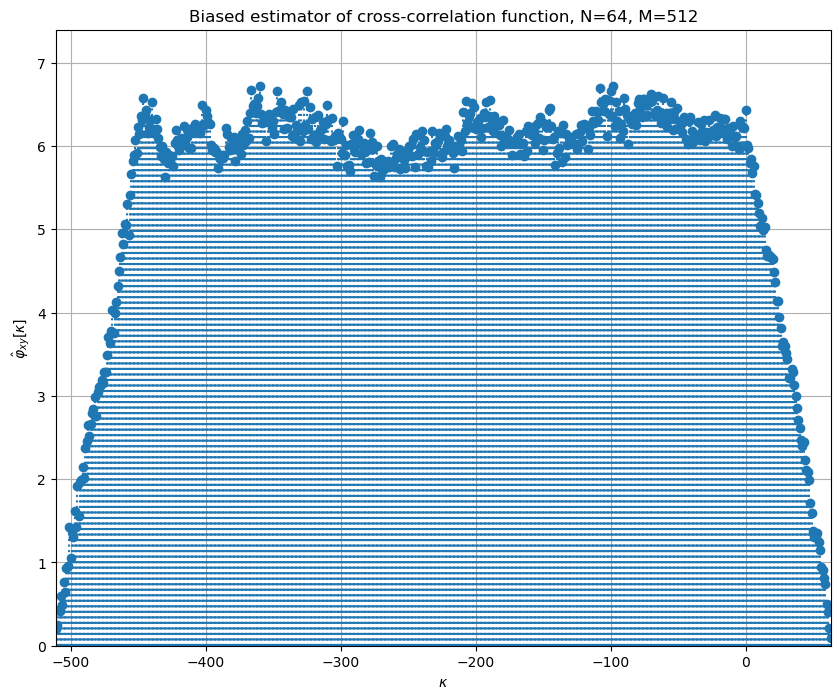

In [ ]:
L = 2**8  # length

# generate two uncorrelated random signals
np.random.seed(1)
x = 2 + np.random.normal(size=L//4)
y = 3 + np.random.normal(size=L*2)

# compute CCF
ccf = 1/len(x) * np.correlate(x, y, mode='full')  # biased estimator
kappa = np.arange(0, len(x)+len(y)-1) - (len(y)-1)
# ccf = L/(L-np.abs(kappa)) * ccf  # unbiased estimator, only if len(x)==len(y)

# print mean values of signals
print('Mean of signal x[k]: %3.2f' % np.mean(x))
print('Mean of signal y[k]: %3.2f' % np.mean(y))

# plot CCF
plt.figure(figsize=(10, 8))
plt.stem(kappa, ccf, basefmt='C0:', linefmt='C0:')
plt.title('Biased estimator of cross-correlation function, N=' +
          str(len(x))+', M='+str(len(y)))
plt.ylabel(r'$\hat{\varphi}_{xy}[\kappa]$')
plt.xlabel(r'$\kappa$')
plt.axis([kappa[0], kappa[-1], 0, 1.1*max(ccf)])
plt.grid()

**Задание 2**

1. Создайте 2 случайных сигнала конечной длины.
2.  Постройте  ККФ двух сигналов конечной длины , постойте график
3.  Каково будет ее теоретическое значение для сигналов бесконечной длины?


Mean of signal x[k]: 3.91
Mean of signal y[k]: 2.80


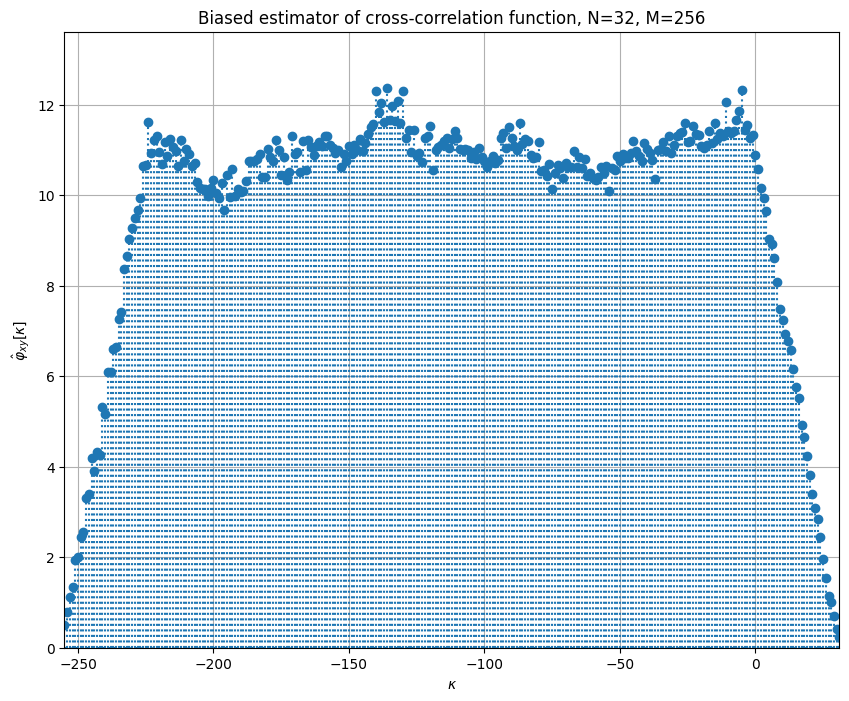

In [ ]:
#1. Создайте 2 случайных сигнала конечной длины.
#2. Постройте ККФ двух сигналов конечной длины , постойте график
#3. Каково будет ее теоретическое значение для сигналов бесконечной длины?

L = 2**8

np.random.seed(1)
x = 4 + np.random.normal(size=L//8)
y = 2.7 + np.random.normal(size=L)

ccf = 1/len(x) * np.correlate(x, y, mode='full')
kappa = np.arange(0, len(x)+len(y)-1) - (len(y)-1)


print('Mean of signal x[k]: %3.2f' % np.mean(x))
print('Mean of signal y[k]: %3.2f' % np.mean(y))

plt.figure(figsize=(10, 8))
plt.stem(kappa, ccf, basefmt='C0:', linefmt='C0:')
plt.title('Biased estimator of cross-correlation function, N=' +
          str(len(x))+', M='+str(len(y)))
plt.ylabel(r'$\hat{\varphi}_{xy}[\kappa]$')
plt.xlabel(r'$\kappa$')
plt.axis([kappa[0], kappa[-1], 0, 1.1*max(ccf)])
plt.grid()

## Средние значения ансамбля

Ансамблевые средние характеризуют средние свойства случайного процесса по совокупности всех возможных выборочных функций в ансамбле. Различают ансамблевые средние первого и высшего порядка. В первом случае рассматриваются средние свойства выборочных функций одного случайного процесса для одного конкретного момента времени $k$, во втором - учитывается более одного случайного процесса с разными моментами времени.

### Определение

Среднее ансамблевое значение первого порядка для непрерывно-амплитудного вещественного случайного сигнала $x[k]$ определяется как

\begin{equation}
E\{ f(x[k])\} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} f(x_n[k]),
\end{equation}

где $E\{ \cdot \}$ обозначает оператор ожидания, $x_n[k]$ - $n$-ю выборочную функцию, а $f(\cdot)$ - произвольную вещественно-значную функцию. Из определения следует, что среднее по ансамблю может быть точно определено только для случайных процессов, внутренняя структура которых известна. Для практических случайных процессов, таких как, например, речь, среднее значение ансамбля может быть аппроксимировано только конечным, но достаточно большим числом $N$ выборочных функций.

С другой стороны, если известна одномерная функция плотности вероятности (ФПВ), характеризующая процесс, то среднее по ансамблю также может быть представлено в виде

\begin{equation}
E\{ f(x[k])\} = \int\limits_{-\infty}^{\infty} f(\theta)\, p_x(\theta, k)\, \mathrm{d}\theta.
\end{equation}
#### Свойства

Из определения ансамблевого среднего можно сделать вывод о следующих свойствах:

1. Средние по ансамблю для двух различных временных инстанций $k_1$ и $k_2$ в общем случае различаются

    \begin{equation}
    E\{ f(x[k_1])\} \neq E\{ f(x[k_2])\}
    \end{equation}
    
2. Для линейного отображения $f(x[k]) = C \cdot x[k]$ с $C \в \mathbb{R} \setminus \{0\}$, среднее по ансамблю является линейной операцией
    
    \begin{equation}
    E\{ A \cdot x[k] + B \cdot y[k]\} = A \cdot E\{ x[k]\} + B \cdot E\{ y[k]\}
    \end{equation}

3. Для детерминированного сигнала $x_n[k] = s[k]$\ для всех n$ ансамблевое среднее имеет вид

    \begin{equation}
    E\{ f(s[k])\} = f(s[k])
    \end{equation}

Выбор функции отображения $f(\cdot)$ определяет конкретное свойство случайного процесса, которое характеризуется ансамблевым средним.

#### ВЫборочное среднее (1-й  момент)

Выборочное среднее, которое задается для линейного отображения $f(x[k]) = x[k]$, представляет собой среднее арифметическое значение по всем выборочным функциям $x_n[k]$

Введя в определение ансамблевого среднего $f(x[k]) = x[k]$, получим

\begin{equation}
\mu_x[k] = E\{ x[k]\} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} x_n[k].
\end{equation}

Если известна ПДФ процесса, то линейное отображение $f(\theta)=\theta$ дает

\begin{equation}
\mu_x[k] = E\{ x[k]\} = \int\limits_{-\infty}^{\infty} \theta \, p_x(\theta, k)\, \mathrm{d}\theta.
\end{equation}

$\mu_x[k]$ - общепринятое стандартное обозначение линейного среднего. Процесс с $\mu_x[k] = 0$ называется *zero-mean* или *mean-free*. Заметим, что $\mu_x$ не следует путать с дискретным частотным индексом ДПФ.

#### Дисперсия (2-й центральный момент)

Дисперсия- квадратичное среднее значение нулевого среднего случайного процесса. З-

\begin{equation}
\sigma_x^2[k] = E\{ (x[k] - \mu_x[k])^2 \} = E\{ \left(x[k] - E\{ x[k] \}\right)^2 \},
\end{equation}

где $\sigma_x^2[k]$ обычно обозначает дисперсию, $\sigma_x[k]$ . Дисперсия характеризует, насколько сильно разбросаны значения амплитуды случайного сигнала от его среднего значения. Она также известна как второй центральный момент.

Дисперсия может быть задана в терминах среднего квадратичного и среднего квадратичного линейного значений

\begin{equation}
\sigma_x^2[k] = E\{ x^2[k]\} - \mu_x^2[k]
\end{equation}

или наоборот, квадратичное среднее равно сумме квадратичного линейного среднего и дисперсии

\begin{equation}
E\{ x^2[k]\} = \mu_x^2[k] + \sigma_x^2[k].
\end{equation}



(0.0, 64.0, 0.0, 1.5)

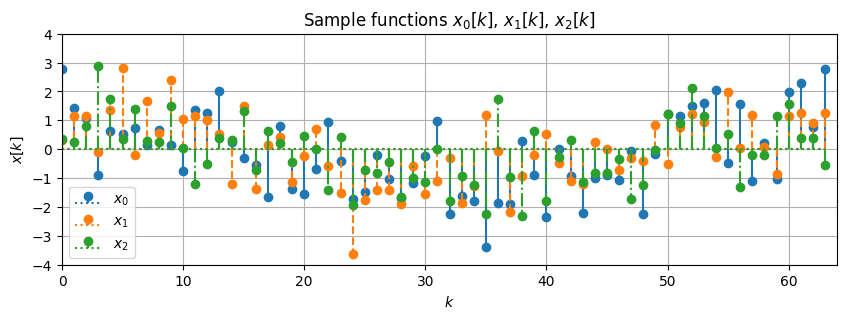

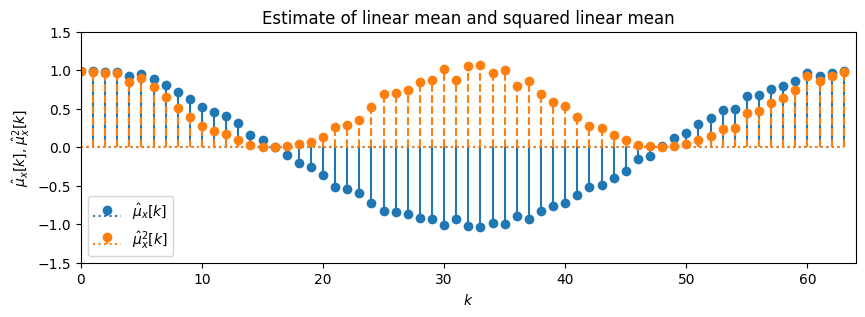

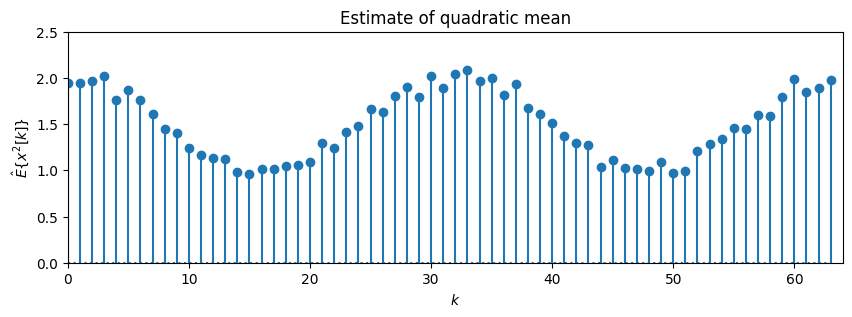

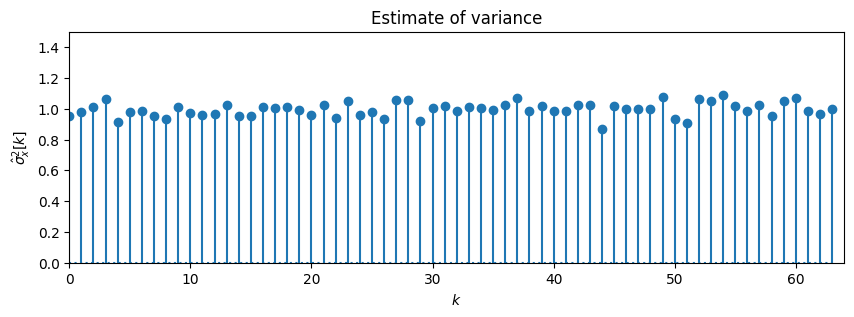

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

K = 64  # number of random samples
N = 1000  # number of sample functions


# generate the sample functions
np.random.seed(3)
x = np.random.normal(size=(N, K))
x += np.tile(np.cos(2*np.pi/K*np.arange(K)), [N, 1])

# estimate the linear mean as ensemble average
mu = 1/N * np.sum(x, 0)
# estimate the quadratic mean
qu = 1/N * np.sum(x**2, 0)
# estimate the variance
sigma = 1/N * np.sum((x-mu)**2, 0)


# plot results
plt.rc('figure', figsize=(10, 3))

plt.figure()
plt.stem(x[0, :], basefmt='C0:', linefmt='C0-',
         markerfmt='C0o', label=r'$x_0$')
plt.stem(x[1, :], basefmt='C1:', linefmt='C1--',
         markerfmt='C1o', label=r'$x_1$')
plt.stem(x[2, :], basefmt='C2:', linefmt='C2-.',
         markerfmt='C2o', label=r'$x_2$')
plt.title(r'Функции $x_0[k]$, $x_1[k]$, $x_2[k]$')
plt.xlabel(r'$k$')
plt.ylabel(r'$x[k]$')
plt.axis([0, K, -4, 4])
plt.legend()
plt.grid(True)

plt.figure()
plt.stem(mu, basefmt='C0:', linefmt='C0-',
         markerfmt='C0o', label=r'$\hat{\mu}_x[k]$')
plt.stem(mu**2, basefmt='C1:', linefmt='C1--',
         markerfmt='C1o', label=r'$\hat{\mu}^2_x[k]$')
plt.title(r'Оценки Среднего и среднее квалратичное')
plt.xlabel(r'$k$')
plt.ylabel(r'$\hat{\mu}_x[k]$, $\hat{\mu}^2_x[k]$')
plt.axis([0, K, -1.5, 1.5])
plt.legend()

plt.figure()
plt.stem(qu, basefmt='C0:')
plt.title(r'Оценки 2го монемта')
plt.xlabel(r'$k$')
plt.ylabel(r'$\hat{E}\{x^2[k]\}$')
plt.axis([0, K, 0, 2.5])

plt.figure()
plt.stem(sigma, basefmt='C0:')
plt.title(r'Оценки дисперсии')
plt.xlabel(r'$k$')
plt.ylabel(r'$\hat{\sigma}^2_x[k]$')
plt.axis([0, K, 0, 1.5])

Звдвние 3.
1. Постройте ансамбль случайных сигналов.
2. Постройте графики среднего, второго момента и дисперсии.

(0.0, 32.0, 0.0, 1.5)

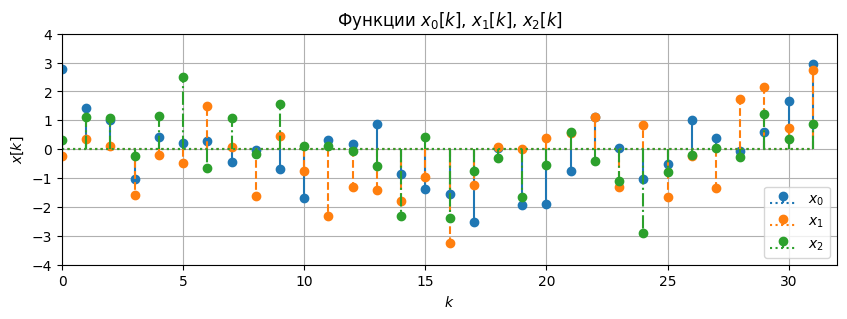

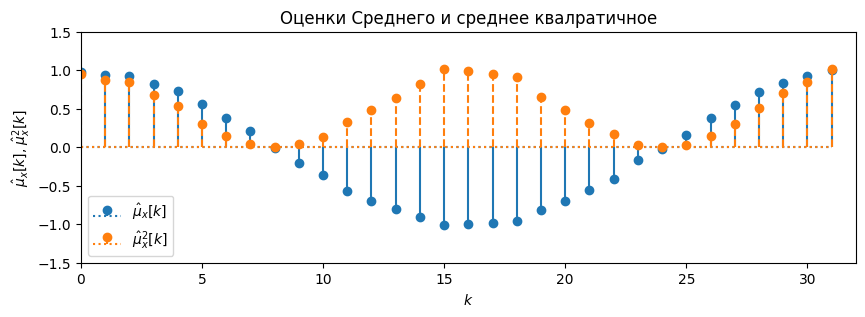

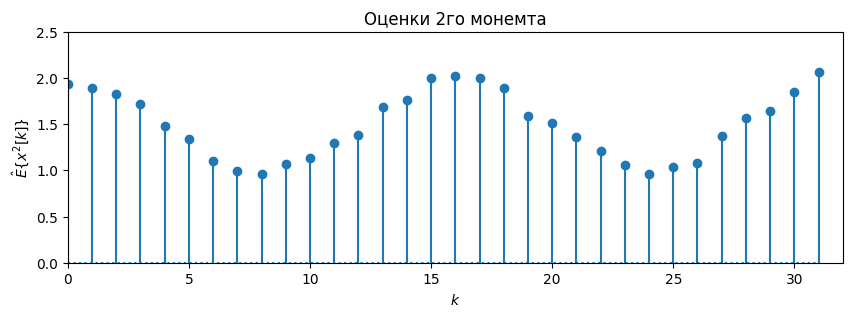

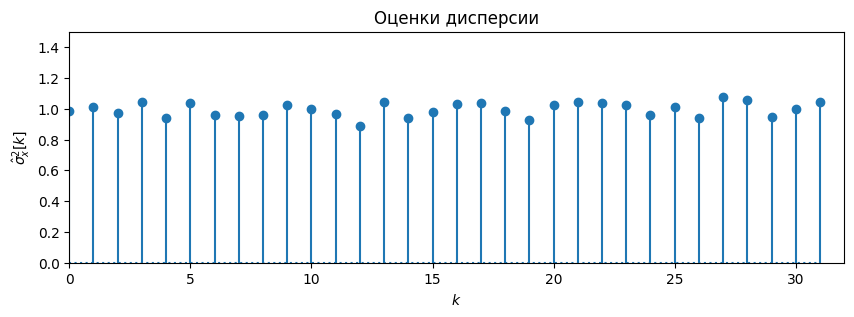

In [ ]:
K = 32
N = 1500

np.random.seed(3)
x = np.random.normal(size=(N, K))
x += np.tile(np.cos(2*np.pi/K*np.arange(K)), [N, 1])

mu = 1/N * np.sum(x, 0)
# estimate the quadratic mean
qu = 1/N * np.sum(x**2, 0)
# estimate the variance
sigma = 1/N * np.sum((x-mu)**2, 0)


plt.rc('figure', figsize=(10, 3))

plt.figure()
plt.stem(x[0, :], basefmt='C0:', linefmt='C0-',
         markerfmt='C0o', label=r'$x_0$')
plt.stem(x[1, :], basefmt='C1:', linefmt='C1--',
         markerfmt='C1o', label=r'$x_1$')
plt.stem(x[2, :], basefmt='C2:', linefmt='C2-.',
         markerfmt='C2o', label=r'$x_2$')
plt.title(r'Функции $x_0[k]$, $x_1[k]$, $x_2[k]$')
plt.xlabel(r'$k$')
plt.ylabel(r'$x[k]$')
plt.axis([0, K, -4, 4])
plt.legend()
plt.grid(True)

plt.figure()
plt.stem(mu, basefmt='C0:', linefmt='C0-',
         markerfmt='C0o', label=r'$\hat{\mu}_x[k]$')
plt.stem(mu**2, basefmt='C1:', linefmt='C1--',
         markerfmt='C1o', label=r'$\hat{\mu}^2_x[k]$')
plt.title(r'Оценки Среднего и среднее квалратичное')
plt.xlabel(r'$k$')
plt.ylabel(r'$\hat{\mu}_x[k]$, $\hat{\mu}^2_x[k]$')
plt.axis([0, K, -1.5, 1.5])
plt.legend()

plt.figure()
plt.stem(qu, basefmt='C0:')
plt.title(r'Оценки 2го монемта')
plt.xlabel(r'$k$')
plt.ylabel(r'$\hat{E}\{x^2[k]\}$')
plt.axis([0, K, 0, 2.5])

plt.figure()
plt.stem(sigma, basefmt='C0:')
plt.title(r'Оценки дисперсии')
plt.xlabel(r'$k$')
plt.ylabel(r'$\hat{\sigma}^2_x[k]$')
plt.axis([0, K, 0, 1.5])

В следующем примере АКФ случайного сигнала $x[k]$ оценивается как ансамблевое среднее конечного числа $N$ выборочных функций. АКФ строится в виде изображения, где цвета обозначают уровень АКФ $\varphi_{xx}[k_1, k_2]$ для заданных временных интервалов $k_1$ и $k_2$.

(0.0, 64.0, 0.0, 64.0)

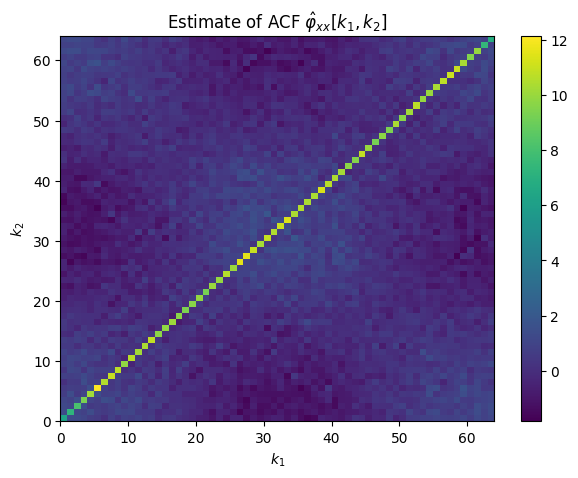

In [ ]:
L = 64  # number of random samples
N = 1000  # number of sample functions

# generate sample functions
np.random.seed(1)
r = np.random.normal(size=(N, L))
h = np.random.normal(size=(N, 10))
x = np.asarray([np.convolve(r[n, :], h[n, :], mode='same') for n in range(N)]) \
    + np.tile(np.cos(2*np.pi/L*np.arange(L)), [N, 1])

# estimate the auto-correlation function (ACF)
acf = np.zeros((L, L))
for n in range(L):
    for m in range(L):
        # x[0, n] * x[0, m] is the product of the 0-th sample function at two different time-steps n,m
        # the individual products are then summed up for all N sample functions
        acf[n, m] = 1/N * np.sum(x[:, n]*x[:, m], axis=0)


# plot ACF
plt.figure(figsize=(7, 5))
plt.pcolormesh(np.arange(L+1), np.arange(L+1), acf)
plt.title(r'Estimate of ACF $\hat{\varphi}_{xx}[k_1, k_2]$')
plt.xlabel(r'$k_1$')
plt.ylabel(r'$k_2$')
plt.colorbar()
plt.axis('tight')

## Независимые процессы

Независимость случайных сигналов является желаемым свойством во многих приложениях статистической обработки сигналов, так же как и некоррелированность и ортогональность.

## Независимость
Два стохастических события считаются независимыми, если вероятность наступления одного из них не зависит от наступления другого. Точнее, если их совместная вероятность равна произведению их индивидуальных вероятностей. В терминах двумерной функции плотности вероятности (ФПВ) двух непрерывно-амплитудных вещественно-значных случайных процессов x[k] и y[k] это выглядит следующим образом

pxy(θx,θy,kx,ky)=px(θx,kx)⋅py(θy,ky)

где px(θx,kx) и py(θy,ky) обозначают одномерные (предельные) ФПВ случайных процессов для моментов времени kx и ky соответственно.  Отсюда следует, что среднее ансамблевое второго порядка для линейного отображения имеет вид

E{x[kx]⋅y[ky]}=E{x[kx]}⋅E{y[ky]}

Линейное среднее ансамбля второго порядка двух независимых случайных сигналов равно умножению их линейных средних ансамбля первого порядка. Для совместных стационарных в широком смысле процессов  двумерная ФПВ зависит только от разности κ=kx-ky временных интервалов. Следовательно, два совместно ВСС-случайных сигнала являются независимыми, если

pxy(θx,θy,κ)=px(θx,kx)⋅py(θy,kx-κ)=px(θx)⋅py(θy,κ).




Пример -
Сравнение двумерной ФПВ и произведения маргинальных ФПВ
В следующем примере оценивается двумернная ФПВ pxx(θ1,θ2,κ) случайного сигнала ВСС x[k] путем вычисления его двумерной гистограммы. Дополнительно оцениваются одномерные ФПВ px(θ1) и px(θ2,κ).

pxx(θ1,θ2,κ)={px(θ1)⋅δ(θ2-θ1)px(θ1)⋅px(θ2,κ)для κ=0 для κ≠0

поскольку условная вероятность px[k]|x[k-κ](θ1,θ2,κ)=δ(θ2-θ1) для κ=0, так как это представляет собой уверенное событие. Двумерная ФПВ независимого случайного сигнала равна произведению одномерных ФПВэтого сигнала и сдвинутого по времени сигнала на κ≠0 . В случайном сигнале, для которого это условие не выполняется, наблюдаются статистические зависимости между выборками.

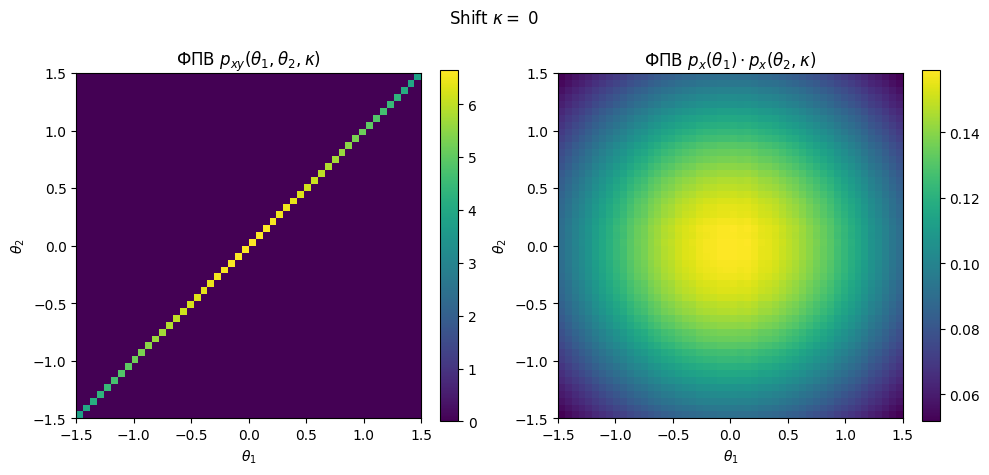

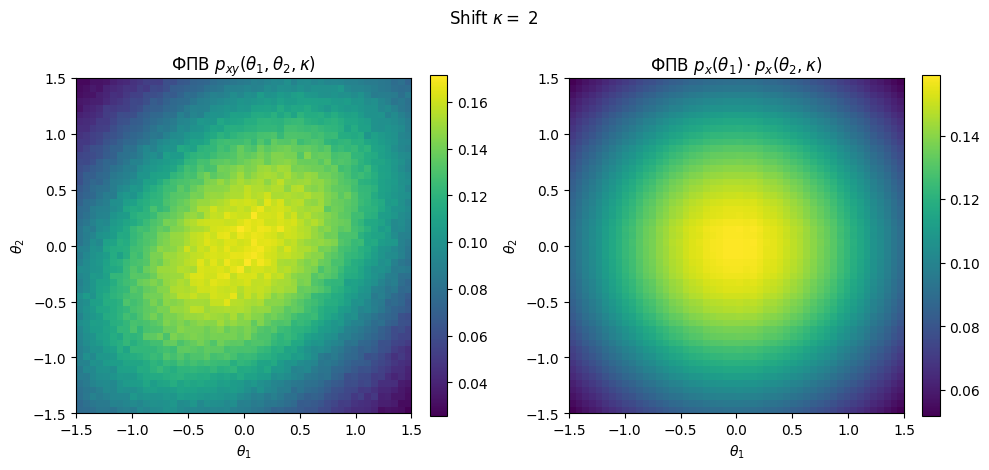

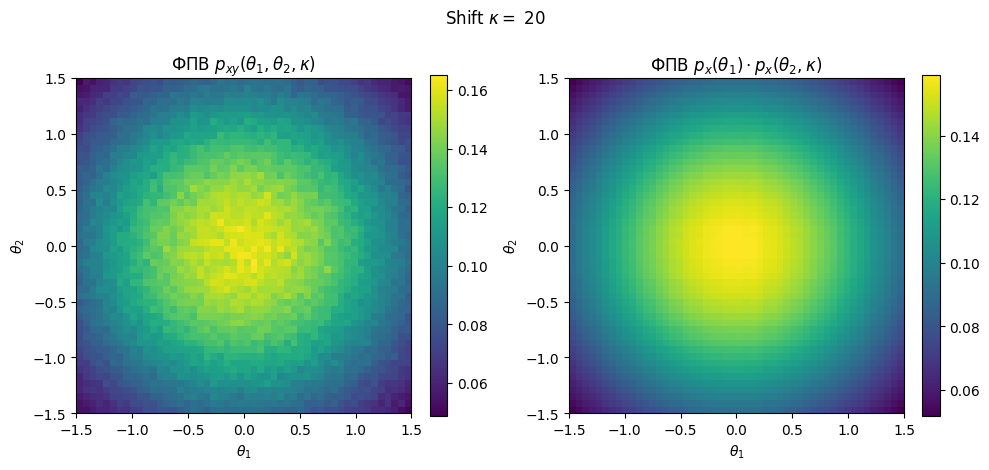

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000000  # количество элементов
M = 50  #


def compute_plot_histograms(kappa):
    '''Оценка и построение гистограмм'''

    # shift signal
    x2 = np.concatenate((x1[kappa:], np.zeros(kappa)))

    # построение гистограмм
    pdf_xx, x1edges, x2edges = np.histogram2d(x1, x2, bins=(
        M, M), range=((-1.5, 1.5), (-1.5, 1.5)), density=True)
    pdf_x1, _ = np.histogram(x1, bins=M, range=(-1.5, 1.5), density=True)
    pdf_x2, _ = np.histogram(x2, bins=M, range=(-1.5, 1.5), density=True)

    # графики
    fig = plt.figure(figsize=(10, 10))

    plt.subplot(121, aspect='equal')
    plt.pcolormesh(x1edges, x2edges, pdf_xx)
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.title(r'ФПВ $p_{{xy}}(\theta_1, \theta_2, \kappa)$')
    plt.colorbar(fraction=0.046)

    plt.subplot(122, aspect='equal')
    plt.pcolormesh(x1edges, x2edges, np.outer(pdf_x1, pdf_x2))
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.title(r'ФПВ $p_x(\theta_1) \cdot p_x(\theta_2, \kappa)$')
    plt.colorbar(fraction=0.046)

    fig.suptitle('Shift $\kappa =$ {:<2.0f}'.format(kappa), y=0.72)
    fig.tight_layout()


#сигналы
x = np.random.normal(size=N)
x1 = np.convolve(x, [1, .5, .3, .7, .3], mode='same')

# графики
compute_plot_histograms(0)
compute_plot_histograms(2)
compute_plot_histograms(20)

Два непрерывно-амплитудных вещественно-значных совместных ВСС случайных процесса $x[k]$ и $y[k]$ называются [некоррелированными] (correlation_functions.ipynb#Properties), если их кросс-корреляционная функция (CCF) равна произведению их линейных средних, $\varphi_{xy}[\kappa] = \mu_x \cdot \mu_y$. Если два случайных сигнала независимы, то они также некоррелированы. Это можно доказать, введя вышеприведенные выводы для линейного среднего второго порядка ансамбля независимых случайных сигналов в определение CCF

\begin{equation}
\varphi_{xy}[\kappa] = E \{ x[k] \cdot y[k - \kappa]\} = E \{ x[k] \} \cdot E \{ y[k - \kappa]\} = \mu_x \cdot \mu_y
\end{equation}

где последнее равенство является следствием предполагаемой стационарности в широком смысле. Обратное утверждение, что два некоррелированных сигнала также независимы, в общем случае не следует из этого результата.

Автокорреляционная функция (АКФ) некоррелированного сигнала имеет вид
 $\varphi_{xx}[\kappa] = \mu_x^2 + \sigma_x^2 \cdot \delta[\kappa]$.
 Подставляя определение независимости в определение АКФ, получаем
\begin{equation}
\begin{split}
\varphi_{xx}[\kappa] &= E \{ x[k] \cdot x[k - \kappa]\} \\
&=
\begin{cases}
E \{ x^2[k]\} & \text{for } \kappa = 0 \\\\
E \{ x[k]\} \cdot E \{ x[k - \kappa]\} & \text{for } \kappa \neq 0
\end{cases} \\
&=
\begin{cases}
\mu_x^2 + \sigma_x^2 & \text{for } \kappa = 0 \\\\
\mu_x^2 & \text{for } \kappa \neq 0
\end{cases} \\
&= \mu_x^2 + \sigma_x^2 \delta[\kappa]
\end{split}
\end{equation}

 Из этого результата можно сделать вывод, что независимый случайный сигнал также является некоррелированным. Обратное утверждение, что некоррелированный сигнал является независимым, в общем случае не выполняется.

### Независимость и ортогональность

Для 2 непрерывных эргодических случайных процессов сигнала $x_N[k]$ и $y_M[k]$ с конечными длинами $N$ и $M$ соответственно. ККФ $\varphi_{xy}[\kappa]$ между ними может быть переформулирована следующим образом

\begin{equation}
\begin{split}
\varphi_{xy}[\kappa] &= \frac{1}{N} \sum_{k=0}^{N-1} x_N[k] \cdot y_M[k-\kappa]\\\
&= \frac{1}{N} < \mathbf{x}_N, \mathbf{y}_M[\kappa] >.
\end{split}
\end{equation}

где $<\cdot, \cdot>$ обозначает [точечное произведение]. Вектор $(N+2M-2)\times 1$ $\mathbf{x}_N$ определяется как

$$\mathbf{x}_N = \left[ \mathbf{0}^T_{(M-1) \times 1}, x[0], x[1], \dots, x[N-1], \mathbf{0}^T_{(M-1) \times 1} \right]^T$$.

где $\mathbf{0}_{(M-1) \times 1}$ обозначает нулевой вектор длины $M-1$. Вектор $(N+2M-2)\times 1$ $\mathbf{y}_M[\kappa]$ определяется как

$$\mathbf{y}_M = \left[ \mathbf{0}^T_{\kappa \times 1}, y[0], y[1], \dots, y[M-1], \mathbf{0}^T_{(N+M-2-\kappa) \times 1}  \right]^T$$.

Понятие ортогональности можно распространить и на один случайный сигнал, задав $\mathbf{y}_M[\kappa] = \mathbf{x}_N[\kappa]$.
 Согласно АКФ среднеквадратичного некоррелированного случайного сигнала $x[k]$, самоортогональность можно определить как

\begin{equation}
\frac{1}{N} < \mathbf{x}_N, \mathbf{x}_N[\kappa] > =
\begin{cases}
\sigma_x^2 & \text{for } \kappa = 0 \\\\
0 & \text{for } \kappa \neq 0
\end{cases}
\end{equation}

Независимый случайный сигнал также ортогонален, если он имеет нулевую среднюю. Обратное утверждение, что ортогональный сигнал является независимым, в общем случае не выполняется.

In [ ]:
def ccf_by_dotprod(x, y):
    '''ККФ.'''

    N = len(x)
    M = len(y)
    xN = np.concatenate((np.zeros(M-1), x, np.zeros(M-1)))
    yM = np.concatenate((y, np.zeros(N+M-2)))

    return np.fromiter([np.dot(xN, np.roll(yM, kappa)) for kappa in range(N+M-1)], float)

<ipython-input-6-af4154ce93d4>:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(kappa, ccf1, use_line_collection=True)
<ipython-input-6-af4154ce93d4>:24: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(kappa, np.abs(ccf1-ccf2), use_line_collection=True)


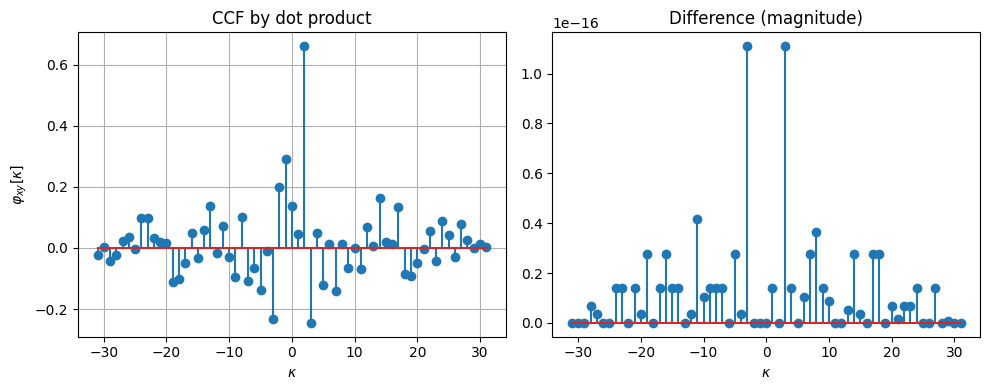

In [ ]:
N = 32  # length of signals

# generate signals
np.random.seed(1)
x = np.random.normal(size=N)
y = np.convolve(x, [1, .5, .3, .7, .3], mode='same')

# compute CCF
ccf1 = 1/N * np.correlate(x, y, mode='full')
ccf2 = 1/N * ccf_by_dotprod(x, y)
kappa = np.arange(-N+1, N)

# plot results
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.stem(kappa, ccf1, use_line_collection=True)
plt.xlabel('$\kappa$')
plt.ylabel(r'$\varphi_{xy}[\kappa]$')
plt.title('CCF by dot product')
plt.grid()

plt.subplot(122)
plt.stem(kappa, np.abs(ccf1-ccf2), use_line_collection=True)
plt.xlabel('$\kappa$')
plt.title('Difference (magnitude)')
plt.tight_layout()

### Пример - периодограмма

В следующем примере оценивается спектральная плотность мощности эргодического случайного процесса, (нормально распределенный белый шум с нулевым средним и единичной дисперсией). Истинное PSD, следовательно, имеет вид $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = 1$. Для вычисления периодограммы методом дискретного преобразования Фурье (ДПФ) сигнал $x[k]$ должен быть дополнен нулями, чтобы квадратизация (умножение) спектров не приводила к круговой свертке.

### Пример - периодограмма

В следующем примере оценивается спектральная плотность мощности эргодического случайного процесса, (нормально распределенный белый шум с нулевым средним и единичной дисперсией). Истинное значение имеет вид $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = 1$. Для вычисления периодограммы методом дискретного преобразования Фурье (ДПФ) сигнал $x[k]$ должен быть дополнен нулями, чтобы квадратизация (умножение) спектров не приводила к круговой свертке.

Среднее: 	 0.0236
Дисперсия: 	 0.7911


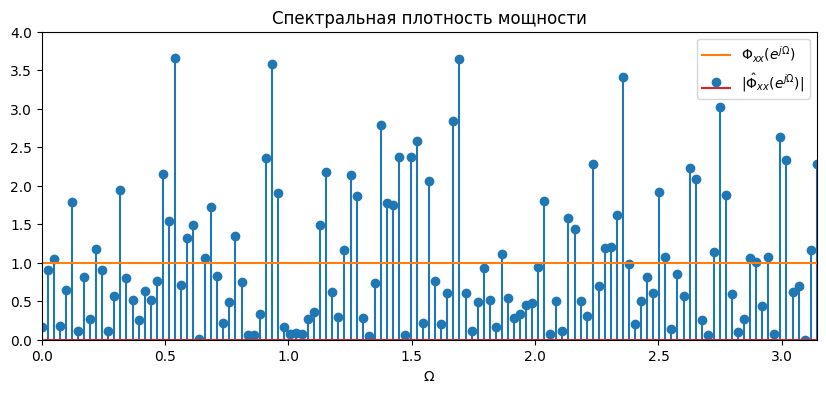

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 128  # number of samples

# generate random signal
np.random.seed(5)
x = np.random.normal(size=N)

# вычисление амплитуды периодограммы
x = np.concatenate((x, np.zeros_like(x)))
X = np.fft.rfft(x)
Om = np.linspace(0, np.pi, len(X))
Pxx = 1/N * abs(X)**2

# графики
plt.figure(figsize=(10, 4))
plt.stem(Om, Pxx, 'C0',
         label=r'$|\hat{\Phi}_{xx}(e^{j \Omega})|$')
plt.plot(Om, np.ones_like(Pxx), 'C1', label=r'$\Phi_{xx}(e^{j \Omega})$')
plt.title('Спектральная плотность мощности')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 4])
plt.legend()

# Среднее и дисперсия периодограммы
print('Среднее: \t {0:1.4f}'.format(np.mean(Pxx-1)))
print('Дисперсия: \t {0:1.4f}'.format(np.var(Pxx)))

## Метод Уэлча

В предыдущем разделе было показано, что периодограмма с использованием ДПФ (PSD) $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ случайного сигнала $x[k]$ не является согласованным методом. Это связано с тем, что дисперсия не сходится к нулю даже при увеличении длины случайного сигнала до бесконечности. Для преодоления этой проблемы используются метод Бартлетта

1. разбить случайный сигнал на сегменты,
2. оценивают PSD для каждого сегмента и
3. усреднение по этим локальным оценкам.

Усреднение уменьшает дисперсию оцененной СПМ. Если в методе Барлетта используются непересекающиеся сегменты, то метод Уэлча является обобщением метода с использованием оконных перекрывающихся сегментов.

### Метод Уэлча
 Случайный сигнал разбивается на $L$ перекрывающихся сегментов длины $N$, начиная с кратных размеров шага $M \ в {1,2, \dots, N}$. Эти сегменты оконцовываются окном $w[k]$ длины $N$, в результате чего получается оконцованный $l$-ый сегмент $x_l[k]$ с $0\leq l\leq L-1$. Дискретное преобразование Фурье (ДПФ) $X_l(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ оконного $l$-сегмента имеет вид

\begin{equation}
X_l(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{k = 0}^{N-1} x[k + l \cdot M]\, w[k]\; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,k}
\end{equation}

где окно $w[k]$, определенное в пределах $0\leq k\leq N-1$, должно быть нормировано как $\frac{1}{N} \sum\limits_{k=0}^{N-1} | w[k] |^2 = 1$. Последнее условие обеспечивает сохранение мощности сигнала в оценке. Размер шага $M$ определяет величину перекрытия сегментов. В общем случае между соседними сегментами перекрывается $N-M$ количество отсчетов. При $M = N$ перекрытия не происходит. Иногда перекрытие задается в виде отношения $\frac{N-M}{N}\cdot 100\%$.

Введя в определение периодограммы $X_l(\mathrm{e}^{\,\mathrm{j}\,\Omega})$, получим периодограмму $l$-го сегмента

\begin{equation}
\hat{\Phi}_{xx,l}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{N} \,| X_l(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2
\end{equation}

Затем оценивается СПМ путем усреднения по периодограммам сегмента $\hat{\Phi}_{xx,l}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$
\begin{equation}
 \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{L} \sum_{l = 0}^{L-1} \hat{\Phi}_{xx,l}(\mathrm{e}^{\,\mathrm{j}\,\Omega})
\end{equation}

Заметим, что общее число $L$ сегментов должно быть выбрано таким образом, чтобы последняя требуемая выборка $(L-1)\cdot M + N - 1$ не превышала общую длину случайного сигнала. В противном случае последний сегмент $x_{L-1}[k]$ может быть занулен до длины $N$.

В методе Бартлетта используется прямоугольное окно $w[k] = \text{rect}_N[k]$ и непересекающиеся сегменты $M=N$. В методе Уэлча используются перекрывающиеся сегменты и окно, которое должно выбираться в зависимости от поставленной задачи спектрального анализа.

### Пример

 Следующий пример для предыдущей периодограммы Задача оценить СПМ случайного процесса,  выборки из нормально распределенного белого шума с нулевым средним и единичной дисперсией. Истинное PSD, следовательно, имеет вид $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = 1$.

<ipython-input-7-d65af5626df5>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(Om, Pxx, 'C0',


Среднее Welch estimate: 		 -0.0114
Дисперсияe Welch estimate: 	 0.0255


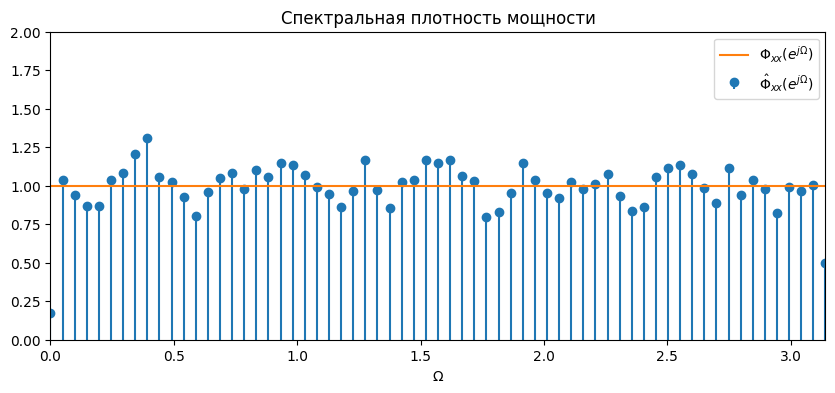

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

N = 128  # длина сешмента
M = 64  # шаг
L = 100  # количество сегментов

# generate random signal
np.random.seed(5)
x = np.random.normal(size=L*M)

# Оценка СПМ Welch's method
nf, Pxx = sig.welch(x, window='hamming', nperseg=N, noverlap=(N-M))
Pxx = .5*Pxx  #  scipy.signal
Om = 2*np.pi*nf

# графмк
plt.figure(figsize=(10, 4))
plt.stem(Om, Pxx, 'C0',
         label=r'$\hat{\Phi}_{xx}(e^{j \Omega})$', basefmt=' ', use_line_collection=True)
plt.plot(Om, np.ones_like(Pxx), 'C1', label=r'$\Phi_{xx}(e^{j \Omega})$')
plt.title('Спектральная плотность мощности')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 2])
plt.legend()

# вычисление среднего и дисперчии
print('Среднее Welch estimate: \t\t {0:1.4f}'.format(np.mean(Pxx-1)))
print('Дисперсияe Welch estimate: \t {0:1.4f}'.format(np.var(Pxx)))

Задание 4.

1. Измените количество сегментов L.
2. Измените длину сегмента N и размер шага M.

<ipython-input-11-757aeb64b689>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(Om, Pxx, 'C0',


Среднее Welch estimate: 		 -0.0065
Дисперсияe Welch estimate: 	 0.0235


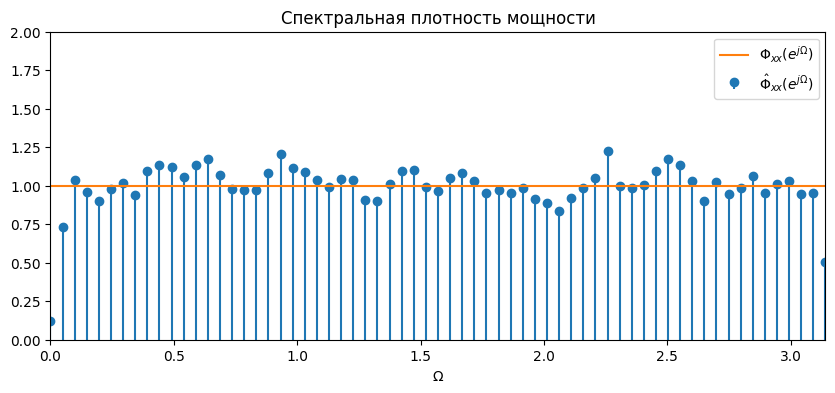

In [ ]:

#1 Измените количество сегментов L.
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

N = 128  # длина сешмента
M = 64  # шаг
L = 223  # количество сегментов

# generate random signal
np.random.seed(69)
x = np.random.normal(size=L*M)

# Оценка СПМ Welch's method
nf, Pxx = sig.welch(x, window='hamming', nperseg=N, noverlap=(N-M))
Pxx = .5*Pxx  #  scipy.signal
Om = 2*np.pi*nf

# графмк
plt.figure(figsize=(10, 4))
plt.stem(Om, Pxx, 'C0',
         label=r'$\hat{\Phi}_{xx}(e^{j \Omega})$', basefmt=' ', use_line_collection=True)
plt.plot(Om, np.ones_like(Pxx), 'C1', label=r'$\Phi_{xx}(e^{j \Omega})$')
plt.title('Спектральная плотность мощности')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 2])
plt.legend()

# вычисление среднего и дисперчии
print('Среднее Welch estimate: \t\t {0:1.4f}'.format(np.mean(Pxx-1)))
print('Дисперсияe Welch estimate: \t {0:1.4f}'.format(np.var(Pxx)))

<ipython-input-12-a39e36623416>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(Om, Pxx, 'C0',


Среднее Welch estimate: 		 0.0050
Дисперсияe Welch estimate: 	 0.0483


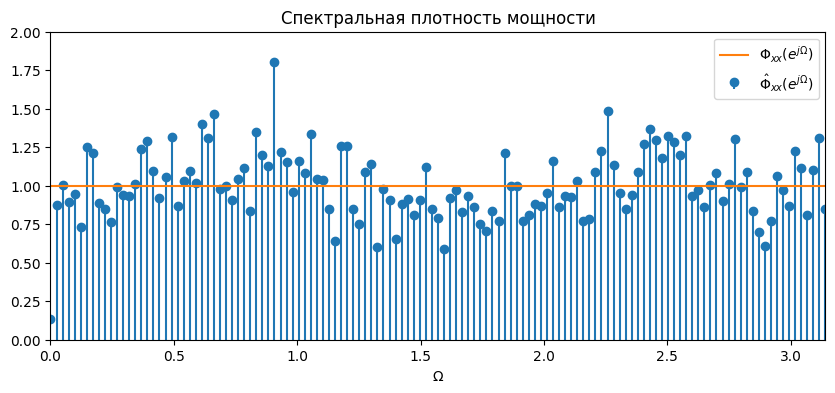

In [ ]:
#2 Измените длину сегмента N и размер шага M.
K = 4096  # длина сигнала
N = 3  # порядок AR модели
a = np.array((1, -1, .5))  # коэффициенты AR модели

spectr_par_estimate(K, N, a)
N = 256  # длина сешмента
M = 32  # шаг
L = 100  # количество сегментов

# generate random signal
np.random.seed(69)
x = np.random.normal(size=L*M)

# Оценка СПМ Welch's method
nf, Pxx = sig.welch(x, window='hamming', nperseg=N, noverlap=(N-M))
Pxx = .5*Pxx  #  scipy.signal
Om = 2*np.pi*nf

# графмк
plt.figure(figsize=(10, 4))
plt.stem(Om, Pxx, 'C0',
         label=r'$\hat{\Phi}_{xx}(e^{j \Omega})$', basefmt=' ', use_line_collection=True)
plt.plot(Om, np.ones_like(Pxx), 'C1', label=r'$\Phi_{xx}(e^{j \Omega})$')
plt.title('Спектральная плотность мощности')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 2])
plt.legend()

# вычисление среднего и дисперчии
print('Среднее Welch estimate: \t\t {0:1.4f}'.format(np.mean(Pxx-1)))
print('Дисперсияe Welch estimate: \t {0:1.4f}'.format(np.var(Pxx)))

## Спектр  случайных сигналов
## Параметрический метод

Непараметрические методы оценки спектральной плотности мощности (PSD), такие как метод периодограмм или метод Уэлча, не опираются на информацию a-priori о процессе, генерирующем случайный сигнал.
Часто имеется некоторая информация a-priori, которая может быть использована для формулировки параметрической модели случайного процесса. Затем ставится задача оценить эти параметры, чтобы охарактеризовать случайный сигнал. Такие методы известны как *параметрические методы* или методы, основанные на модели. Учет априорных знаний может значительно улучшить оценку PSD. Параметрическая модель случайного процесса также может быть использована для генерации случайных сигналов с желаемым РП.

### Модели процессов

Рассматриваем стационарные вещественные случайные процессы в широким смысле.

В общем случае случайный сигнал $x[k]$ будет коррелированным в результате обработки некоррелированного входного сигнала $n[k]$ системой $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. В силу предположения о белом шуме $\Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = N_0$, PSD случайного процесса имеет вид

\begin{equation}
\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = N_0 \cdot | H(\mathrm{e}^{\,\mathrm{j}\,\Omega})|^2
\end{equation}

Параметрические методы моделируют систему $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ ограниченным числом параметров. Эти параметры затем оцениваются по $x[k]$, получая оценку $\hat{H}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ передаточной функции. Эта оценка затем используется для расчета желаемой оценки $\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ PSD.


#### АР модель (авторегрессии)

Модель АР предполагает наличие рекурсивной системы с прямым контуром. Ее выходная зависимость имеет вид

\begin{equation}
x[k] = \sum_{n=1}^{N} a_n \cdot x[k-n] + n[k]
\end{equation}

где $a_n$ обозначают коэффициенты рекурсивного пути, а $N$ - порядок модели. Ее системная функция $H(z)$ получается путем $z$-преобразования выходного соотношения

\begin{equation}
H(z) = \frac{1}{1 - \sum_{n=1}^{N} a_n z^{-n}}
\end{equation}

Следовательно, АР-модель является полюсной моделью системы.

#### Модель скользящего среднего

Модель скользящего среднего МА предполагает нерекурсивную систему. Выходная зависимость задается в виде

\begin{equation}
x[k] = \sum_{m=0}^{M-1} b_m \cdot n[k-m] = h[k] * n[k]
\end{equation}

с импульсной характеристикой системы $h[k] = [ b_0, b_1, \dots, b_{M-1} ]$. Модель МА представляет собой модель случайного процесса с конечным импульсным откликом (КИО). Ее системная функция имеет вид

\begin{equation}
H(z) = \mathcal{Z} \{ h[k]\} = \sum_{m=0}^{M-1} b_m \; z^{-m}
\end{equation}

Модель авторегрессионного скользящего среднего
Модель авторегрессионного скользящего среднего (ARMA) представляет собой комбинацию моделей AR и MA. Она представляет собой общую модель линейного процесса. Ее выходная зависимость имеет вид

x[k]=∑n=1Nan⋅x[k−n]+∑m=0M−1bm⋅n[k−m]

Его системная функция имеет вид

H(z)=∑M-1m=0bmz-m1-∑Nn=1anz-n

## Параметрическое спектральное оценивание

Случайный сигнал $x[k]$, задача - оценить параметры модели. Этого можно достичь, определив  систему $G(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ такую, чтобы декоррелировать сигнал $x[k]$

$e[k]$----$H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ -------$x[k]$

где $e[k]$ - белый шум. В связи с этим фильтр $G(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ также обозначается как *отбеливающий фильтр*. Оптимальный фильтр $G(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ задается обратной системой $\frac{1}{H(\mathrm{e}^{\,\mathrm{j}\,\Omega})}$. Однако $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ в общем случае неизвестно. Но из этого, тем не менее, следует, что наша модель линейного процесса $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ применима и к $G(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. Для оценки параметров фильтра $G(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ таким образом, чтобы $e[k]$ стал декоррелированным, разработаны различные методики. Например, путем выражения автокорреляционной функции (АКФ) $\varphi_{xx}[\kappa]$ уравнениями  Юла-Уокера.

После оценки параметров модели их можно использовать для расчета оценки $\hat{G}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ анализируемой системы. Тогда искомая оценка РП имеет вид

\begin{equation}
\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{\Phi_{ee}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}{|\hat{G}(\mathrm{e}^{\,\mathrm{j}\,\Omega})|^2}
\end{equation}

где если $e[k]$ - белый шум, то $\Phi_{ee}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = N_0$.


### Пример

В следующем примере $n[k]$ берется из нормально распределенного белого шума с $N_0 = 1$. Уравнения Юла-Уокера используются для оценки параметров AR-модели $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. Реализация, предоставляемая `statsmodels.api.regression.yule_walker`, возвращает оцененные AR-коэффициенты системы $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$.
 Эти параметры затем используются для численной оценки предполагаемой передаточной функции, в результате  $\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = 1 \cdot \vert \hat{H}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \vert^2$.

Среднее Welch estimate: 		 2.8932
Дисперсия Welch estimate: 	 62.0748
Среднее параметрической оценки: 	 -0.0291
Дисперсия параметрической оценки: 	 15.3476


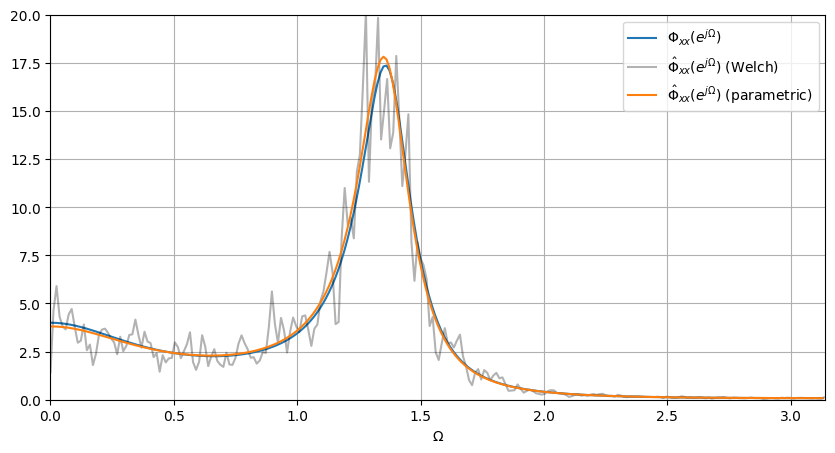

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.signal as sig


K = 4096  # длина сигнала
N = 3  # порядок AR модели
a = np.array((1, -1, .5))  # коэффициенты AR модели

# generate random signal n[k]
np.random.seed(2)
n = np.random.normal(size=K)

# AR model for random signal x[k]
x = np.zeros(K)
for k in np.arange(3, K):
    x[k] = a[0]*x[k-1] + a[1]*x[k-2] + a[2]*x[k-3] + n[k]

# оценка параметров AR модели уравнениями Юла-Уокера
rho, sigma = sm.regression.yule_walker(x, order=N, method='mle')

#
Om, H = sig.freqz(1, np.insert(-a, 0, 1), worN=256)
Om, He = sig.freqz(1, np.insert(-rho, 0, 1), worN=256)
# вычисление спектральной плотности мощности методом Юла-Уокера
Om2, Pxx = sig.welch(x, nperseg=511, return_onesided=True)

# графики
plt.figure(figsize=(10, 5))
plt.plot(Om, np.abs(H)**2, label=r'$\Phi_{xx}(e^{j\Omega})$')
plt.plot(Om2*2*np.pi, .5*Pxx, 'k-', alpha=.3,
         label=r'$\hat{\Phi}_{xx}(e^{j\Omega})$ (Юла-Уокера )')
plt.plot(Om, np.abs(He)**2,
         label=r'$\hat{\Phi}_{xx}(e^{j\Omega})$ (параметрическая оценка)')

plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 20])
plt.legend()
plt.grid()

# среднне/дисперсия
print('Среднее Welch estimate: \t\t {0:1.4f}'.format(
    np.mean(Pxx-np.abs(H)**2)))
print('Дисперсия Welch estimate: \t {0:1.4f}'.format(np.var(Pxx)))
print('Среднее параметрической оценки: \t {0:1.4f}'.format(
    np.mean(np.abs(H)**2-np.abs(He)**2)))
print('Дисперсия параметрической оценки: \t {0:1.4f}'.format(
    np.var(np.abs(He)**2)))

Задание

1. Измените порядок N AR-модели, используемой для оценки по уравнениям Юла-Уокера. Что произойдет, если порядок будет меньше или больше порядка истинной системы?

2. Измените количество выборок K. Согласуется ли оценка?
3. Постройте АР-модель второго порядка.
4. Вычислите СПМ параметрическим способом.
4. Вычислите спектральную плотность мощности с помощью уравнений Юла-Уокера.
5. Постройте графики.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.signal as sig

def spectr_par_estimate(K, N, a):
    # generate random signal n[k]
    np.random.seed(2)
    n = np.random.normal(size=K)

    # AR model for random signal x[k]
    x = np.zeros(K)
    for k in np.arange(3, K):
        x[k] = a[0]*x[k-1] + a[1]*x[k-2] + a[2]*x[k-3] + n[k]

    # оценка параметров AR модели уравнениями Юла-Уокера
    rho, sigma = sm.regression.yule_walker(x, order=N, method='mle')

    #
    Om, H = sig.freqz(1, np.insert(-a, 0, 1), worN=256)
    Om, He = sig.freqz(1, np.insert(-rho, 0, 1), worN=256)
    # вычисление спектральной плотности мощности методом Юла-Уокера
    Om2, Pxx = sig.welch(x, nperseg=511, return_onesided=True)

    # графики
    plt.figure(figsize=(10, 5))
    plt.plot(Om, np.abs(H)**2, label=r'$\Phi_{xx}(e^{j\Omega})$')
    plt.plot(Om2*2*np.pi, .5*Pxx, 'k-', alpha=.3,
            label=r'$\hat{\Phi}_{xx}(e^{j\Omega})$ (Юла-Уокера )')
    plt.plot(Om, np.abs(He)**2,
            label=r'$\hat{\Phi}_{xx}(e^{j\Omega})$ (параметрическая оценка)')

    plt.xlabel(r'$\Omega$')
    plt.axis([0, np.pi, 0, 20])
    plt.legend()
    plt.grid()

    # среднне/дисперсия
    print('Среднее Welch estimate: \t\t {0:1.4f}'.format(
        np.mean(Pxx-np.abs(H)**2)))
    print('Дисперсия Welch estimate: \t {0:1.4f}'.format(np.var(Pxx)))
    print('Среднее параметрической оценки: \t {0:1.4f}'.format(
        np.mean(np.abs(H)**2-np.abs(He)**2)))
    print('Дисперсия параметрической оценки: \t {0:1.4f}'.format(
        np.var(np.abs(He)**2)))

Среднее Welch estimate: 		 2.8932
Дисперсия Welch estimate: 	 62.0748
Среднее параметрической оценки: 	 -0.0291
Дисперсия параметрической оценки: 	 15.3476


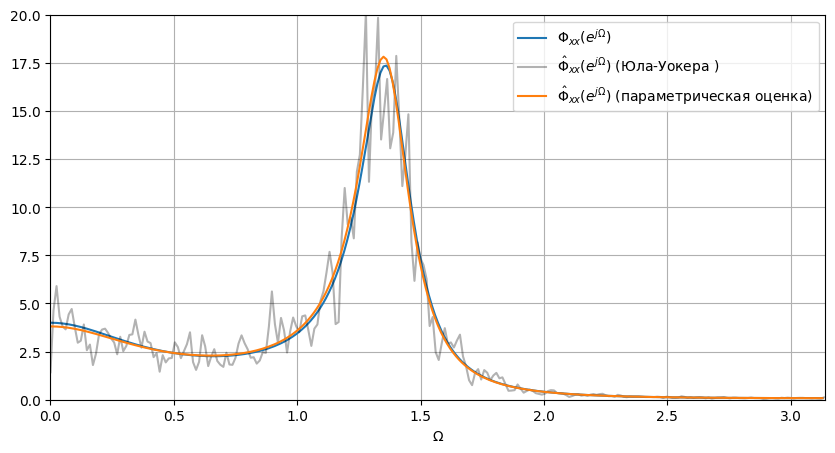

In [ ]:
K = 4096  # длина сигнала
N = 3  # порядок AR модели
a = np.array((1, -1, .5))  # коэффициенты AR модели

spectr_par_estimate(K, N, a)

Среднее Welch estimate: 		 2.8932
Дисперсия Welch estimate: 	 62.0748
Среднее параметрической оценки: 	 -0.0293
Дисперсия параметрической оценки: 	 15.0548


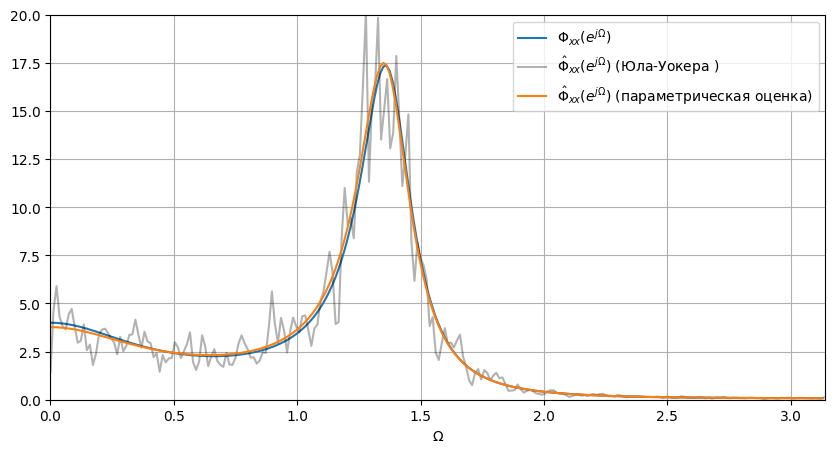

In [ ]:
K = 4096  # длина сигнала
N = 5  # порядок AR модели
a = np.array((1, -1, .5))  # коэффициенты AR модели

spectr_par_estimate(K, N, a)

#1 При увеличении порядка N изменений не наблюдается,
# При увеличении параметрическая оценка сглаживается (значение дисперсии снижается). Оценка перестаёт согласовываться

Среднее Welch estimate: 		 2.5556
Дисперсия Welch estimate: 	 85.6530
Среднее параметрической оценки: 	 0.0614
Дисперсия параметрической оценки: 	 14.0893


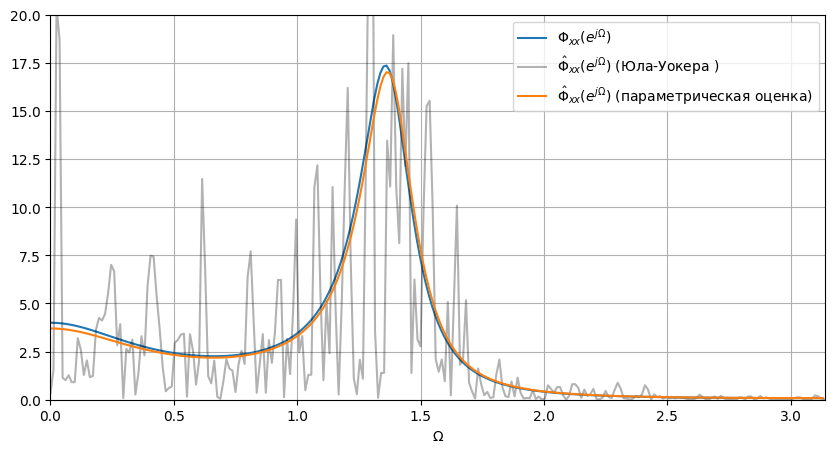

In [ ]:
K = 512  # длина сигнала
N = 3  # порядок AR модели
a = np.array((1, -1, .5))  # коэффициенты AR модели

spectr_par_estimate(K, N, a)
# 2. С увеличение количества выборок оценка согласуется с большей степенью, чем изначально (особено видно на оценке Юла-Уокера)
# С уменьшением появляется несогласованность оценок

Среднее Welch estimate: 		 2.5556
Дисперсия Welch estimate: 	 85.6530
Среднее параметрической оценки: 	 0.7409
Дисперсия параметрической оценки: 	 7.5493


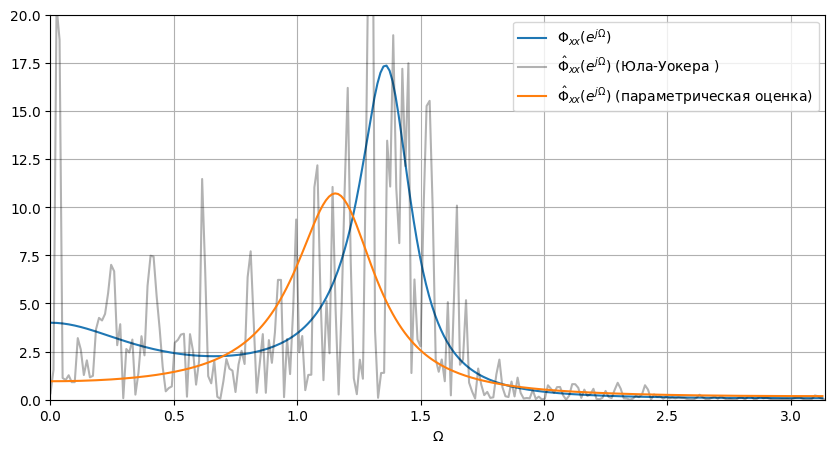

In [ ]:
# ar модель второго порядка
K = 512  # длина сигнала
N = 2  # порядок AR модели
a = np.array((1, -1, .5))  # коэффициенты AR модели

spectr_par_estimate(K, N, a)

<ipython-input-19-8f6973cb100b>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(Om, Pxx, 'C0',


Среднее Welch estimate: 		 1.9619
Дисперсияe Welch estimate: 	 41.3968


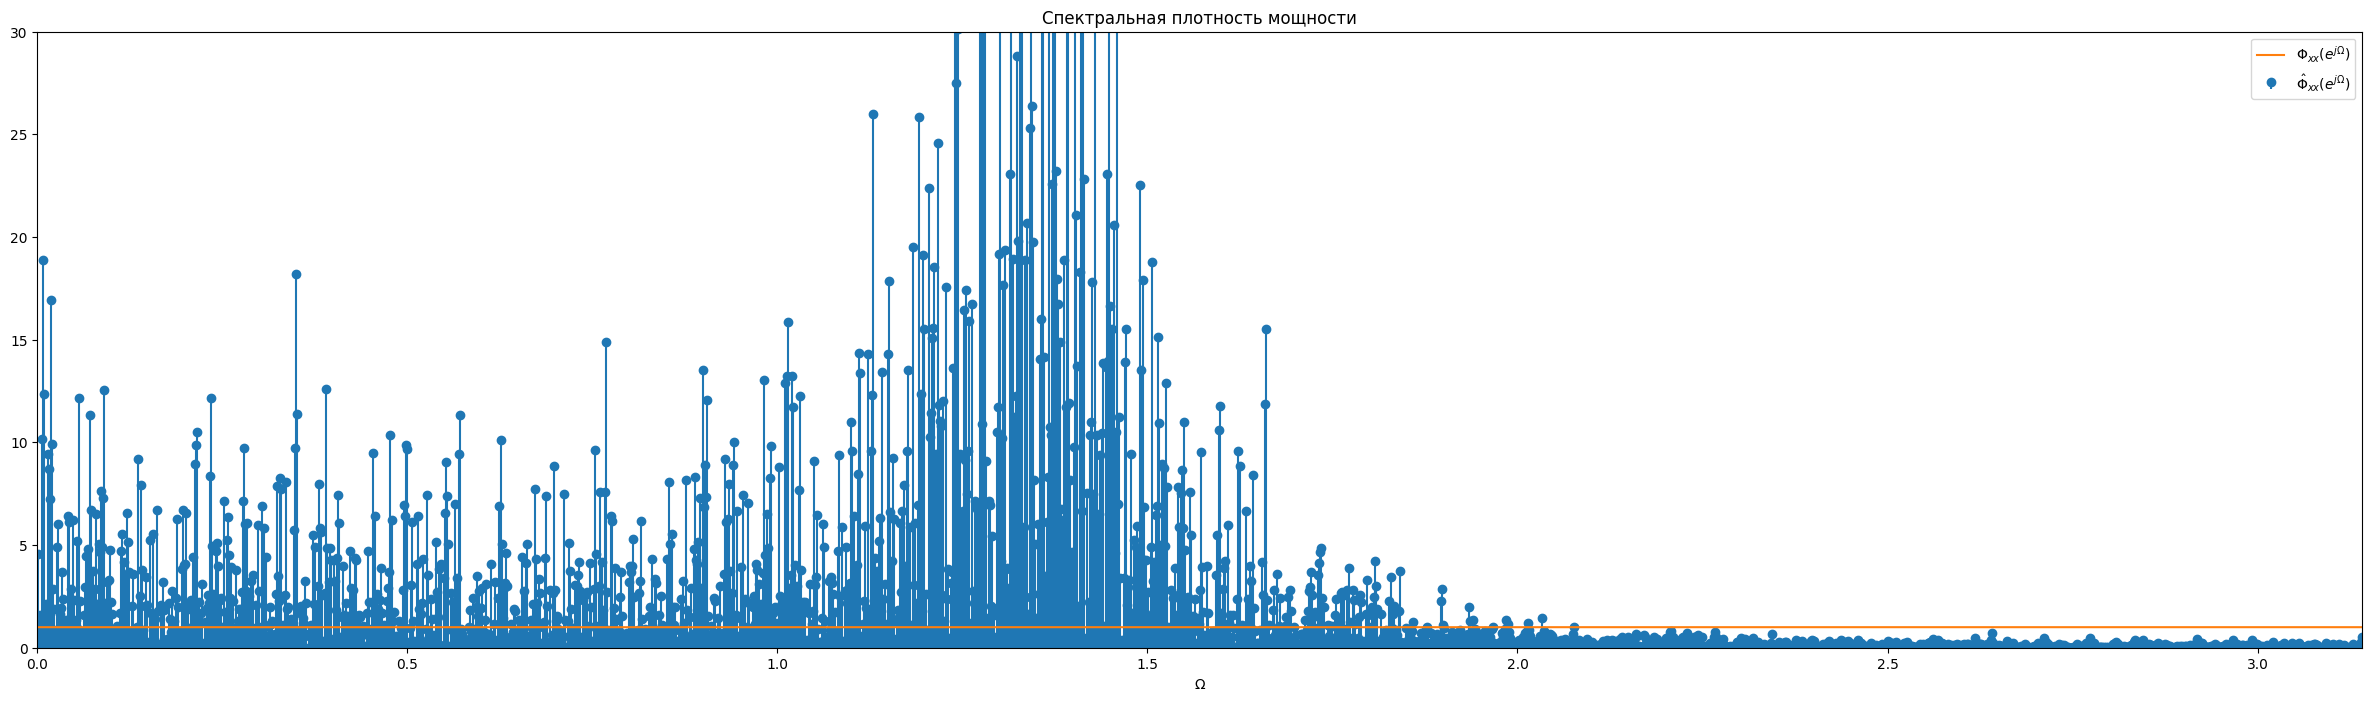

In [ ]:
#4. Вычислите СПМ параметрическим способом.

#5. Вычислите спектральную плотность мощности с помощью уравнений Юла-Уокера.

#6. Постройте графики

K = 4096  # длина сигнала
M = 127  # шаг

a = np.array((1, -1, .5))  # коэффициенты AR модели

# generate random signal n[k]
np.random.seed(2)
n = np.random.normal(size=K)

# AR model for random signal x[k]
x = np.zeros(K)
for k in np.arange(3, K):
    x[k] = a[0]*x[k-1] + a[1]*x[k-2] + a[2]*x[k-3] + n[k]

# оценка параметров AR модели уравнениями Юла-Уокера

# Оценка СПМ Welch's method
nf, Pxx = sig.welch(x, window='hamming', nperseg=K, noverlap=(K-M))
Pxx = .5*Pxx  #  scipy.signal
Om = 2*np.pi*nf

# графмк
plt.figure(figsize=(30, 8))
plt.stem(Om, Pxx, 'C0',
         label=r'$\hat{\Phi}_{xx}(e^{j \Omega})$', basefmt=' ', use_line_collection=True)
plt.plot(Om, np.ones_like(Pxx), 'C1', label=r'$\Phi_{xx}(e^{j \Omega})$')
plt.title('Спектральная плотность мощности')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 30])
plt.legend()

print('Среднее Welch estimate: \t\t {0:1.4f}'.format(np.mean(Pxx-1)))
print('Дисперсияe Welch estimate: \t {0:1.4f}'.format(np.var(Pxx)))

<ipython-input-20-8f6973cb100b>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(Om, Pxx, 'C0',


Среднее Welch estimate: 		 1.9619
Дисперсияe Welch estimate: 	 41.3968


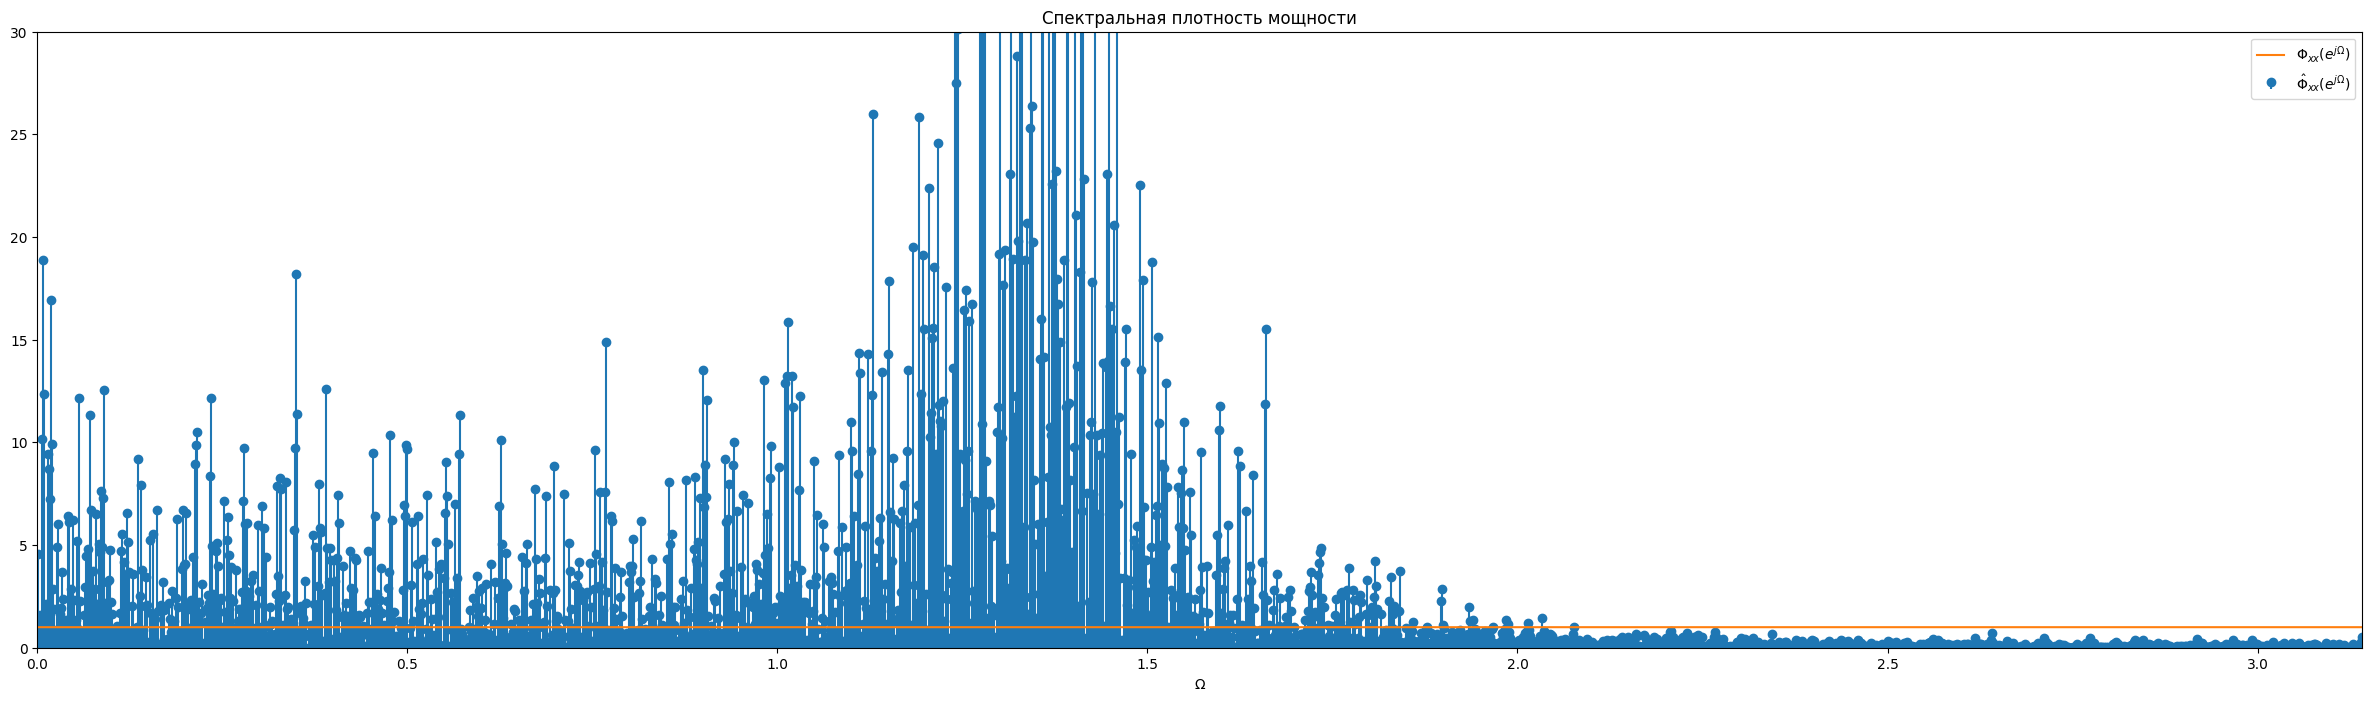

In [ ]:
#4. Вычислите СПМ параметрическим способом.

#5. Вычислите спектральную плотность мощности с помощью уравнений Юла-Уокера.

#6. Постройте графики

K = 4096  # длина сигнала
M = 127  # шаг

a = np.array((1, -1, .5))  # коэффициенты AR модели

# generate random signal n[k]
np.random.seed(2)
n = np.random.normal(size=K)

# AR model for random signal x[k]
x = np.zeros(K)
for k in np.arange(3, K):
    x[k] = a[0]*x[k-1] + a[1]*x[k-2] + a[2]*x[k-3] + n[k]

# оценка параметров AR модели уравнениями Юла-Уокера

# Оценка СПМ Welch's method
nf, Pxx = sig.welch(x, window='hamming', nperseg=K, noverlap=(K-M))
Pxx = .5*Pxx  #  scipy.signal
Om = 2*np.pi*nf

# графмк
plt.figure(figsize=(30, 8))
plt.stem(Om, Pxx, 'C0',
         label=r'$\hat{\Phi}_{xx}(e^{j \Omega})$', basefmt=' ', use_line_collection=True)
plt.plot(Om, np.ones_like(Pxx), 'C1', label=r'$\Phi_{xx}(e^{j \Omega})$')
plt.title('Спектральная плотность мощности')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 30])
plt.legend()

print('Среднее Welch estimate: \t\t {0:1.4f}'.format(np.mean(Pxx-1)))
print('Дисперсияe Welch estimate: \t {0:1.4f}'.format(np.var(Pxx)))


# Фильтр Винера

Фильтр Винера (https://en.wikipedia.org/wiki/Wiener_filter), названный в честь Норберта Винера , предназначен для оценки неизвестного случайного сигнала путем фильтрации зашумленного искаженного наблюдения этого сигнала. Он имеет широкий спектр применения в обработке сигналов. Например, подавление шума, идентификация систем, деконволюция и обнаружение сигналов. Фильтр Винера часто используется в качестве базового элемента алгоритмов, позволяющих обесцвечивать звуковые сигналы, например, речь, или удалять шум с изображения.


### Модель сигнала

В основе фильтра Винера лежит следующая модель сигнала


Случайный сигнал $s[k]$ подвергается искажению линейной  системой $G(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ и аддитивным шумом $n[k]$, в результате чего получается наблюдаемый сигнал $x[k] = s[k] * g[k] + n[k]$. Предполагается, что аддитивный шум $n[k]$ некоррелирован с $s[k]$. Кроме того, предполагается, что все случайные сигналы являются стационарными в широком смысле (ШСС).

Основная концепция фильтра Винера заключается в применении линейной системы $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ к наблюдаемому сигналу $x[k]$ таким образом, чтобы выходной сигнал $y[k] = x[k] * h[k]$ как можно точнее соответствовал $s[k]$. Для количественной оценки отклонения между $y[k]$ и $s[k]$ используется сигнал ошибки

\begin{equation}
e[k] = y[k] - s[k]
\end{equation}

вводится.
Ошибка $e[k]$ равна нулю, если выходной сигнал $y[k]$ идеально совпадает с $s[k]$.
В общем случае эта цель не может быть достигнута в строгом смысле. В качестве альтернативы можно стремиться к минимизации линейного среднего значения ошибки $e[k]$. Однако эта величина не очень хорошо подходит для оптимизации, так как является знаковой. Вместо этого в фильтре Винера и других методах используется квадратичное среднее значение ошибки $e[k]$.

### Передаточная функция фильтра Винера

На вход фильтра подается сигнал $x[k]$ и выбранным статистическим мерам. Предполагается, что известны перекрестная спектральная плотность мощности $\Phi_{xs}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ между наблюдаемым сигналом $x[k]$ и исходным сигналом $s[k]$, а также PSD наблюдаемого сигнала $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. СПМ может быть получена  либо путем оценки по результатам измерений, проведенных в реальной системе, либо с помощью подходящих статистических моделей.

Оптимальный фильтр находится путем минимизации MSE $E \{ |e[k]|^2 \}$ относительно передаточной функции $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$.  Передаточная функция фильтра Винера имеет вид

\begin{equation}
H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{\Phi_{sx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}{\Phi_{xx}(\mathrm{e}^{\, \mathrm{j}\,\Omega})} = \frac{\Phi_{xs}(\mathrm{e}^{\,-\mathrm{j}\,\Omega})}{\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}
\end{equation}

для $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})\neq 0$.
При этом не требуется никаких знаний о реальном процессе искажения, кроме предположения о наличии динамической системы и аддитивного шума.


 **Пример - отбеливание сигнала**.

 Предполагается, что исходный сигнал является детерминированным сигналом $s[k] = \sin[\Omega_0\,k]$, который искажен линейной системой и является эргодическим белым шумом с СПМ $N_0 = 0,1$. СПМ $\Phi_{sx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ и $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ оцениваются по $s[k]$ и $x[k]$ с помощью методики Уэлча(.
 Фильтр Винера применяется к наблюдению $x[k]$ для вычисления оценки $y[k]$ сигнала $s[k]$. Заме

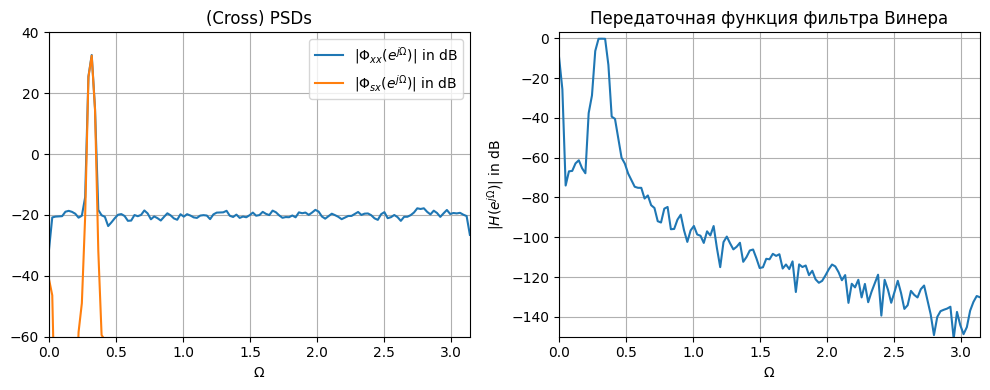

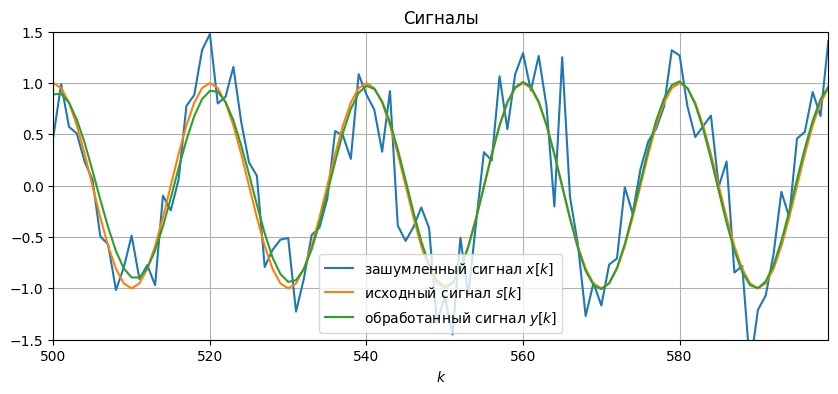

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

N = 2**14  # количество
M = 256  # длина фильтра
Om0 = 0.1*np.pi  # яастота исходного сигнала
N0 = 0.1  # СПМ аддитивного белого шума

# generate original signal
s = np.cos(Om0 * np.arange(N))
# generate observed signal
g = 1/20*np.asarray([1, 2, 3, 4, 5, 4, 3, 2, 1])
np.random.seed(1)
n = np.random.normal(size=N, scale=np.sqrt(N0))
x = np.convolve(s, g, mode='same') + n
# Оценка СПМ с помощье метода Уэлча
f, Pxx = sig.csd(x, x, nperseg=M)
f, Psx = sig.csd(s, x, nperseg=M)
# фильтр Винера
H = Psx/Pxx
H = H * np.exp(-1j*2*np.pi/len(H)*np.arange(len(H)) *
               (len(H)//2))  # shift for causal filter
h = np.fft.irfft(H)
# добавление фильтра к оцениваемому сигналу
y = np.convolve(x, h, mode='same')

# построение СПМ
Om = np.linspace(0, np.pi, num=len(H))

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(Om, 20*np.log10(np.abs(.5*Pxx)),
         label=r'$| \Phi_{xx}(e^{j \Omega}) |$ in dB')
plt.plot(Om, 20*np.log10(np.abs(.5*Psx)),
         label=r'$| \Phi_{sx}(e^{j \Omega}) |$ in dB')
plt.title('(Cross) PSDs')
plt.xlabel(r'$\Omega$')
plt.legend()
plt.axis([0, np.pi, -60, 40])
plt.grid()

# передаточная функция фильтра Винера
plt.subplot(122)
plt.plot(Om, 20*np.log10(np.abs(H)))
plt.title('Передаточная функция фильтра Винера')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$| H(e^{j \Omega}) |$ in dB')
plt.axis([0, np.pi, -150, 3])
plt.grid()
plt.tight_layout()

# сигналы
idx = np.arange(500, 600)
plt.figure(figsize=(10, 4))
plt.plot(idx, x[idx], label=r'зашумленный сигнал $x[k]$')
plt.plot(idx, s[idx], label=r'исходный сигнал $s[k]$')
plt.plot(idx, y[idx], label=r'обработанный сигнал $y[k]$')
plt.title('Сигналы')
plt.xlabel(r'$k$')
plt.axis([idx[0], idx[-1], -1.5, 1.5])
plt.legend()
plt.grid()

### Оптимальный фильтр Винера

Модернизация фильтра Винера. Его можно переписать, введя частотно-зависимое отношение [сигнал-шум] $\text{SNR}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{\Phi_{ss}(\mathrm{e}^{\, \mathrm{j}\,\Omega})}{\Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}$ между исходным сигналом и шумом как

\begin{equation}
H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{G(\mathrm{e}^{\,\mathrm{j}\,\Omega})} \cdot \left( \frac{|G(\mathrm{e}^{\,\mathrm{j}\,\Omega})|^2}{|G(\mathrm{e}^{\,\mathrm{j}\,\Omega})|^2 + \frac{1}{\text{SNR}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}} \right)
\end{equation}

Теперь рассмотрим два частных случая:

1. Если аддитивный шум отсутствует $\Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = 0$, то выражение в скобках равно 1. Следовательно, фильтр Винера просто задается как обратная система к искажающей системе $$H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{G(\mathrm{e}^{\,\mathrm{j}\,\Omega})}$$.

2. Если искажающая система является просто проходной $G(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = 1$, то фильтр Винера имеет вид

    $$H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{\text{SNR}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}{\text{SNR}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) + 1}=\frac{\Phi_{ss}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}{\Phi_{ss}(\mathrm{e}^{\,\mathrm{j}\,\Omega})+\Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}$$
    Рассматриваются два крайних случая
    * for $\Phi_{ss}(\mathrm{e}^{\,\mathrm{j}\,\Omega})\gg \Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ (высокий $\text{SNR}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$) на заданной частоте $\Omega$ передаточная функция приближается к 1
    * for $\Phi_{ss}(\mathrm{e}^{\,\mathrm{j}\,\Omega})\ll \Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ (низкий $\text{SNR}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$) на заданной частоте $\Omega$ передаточная функция приближается к 0
    


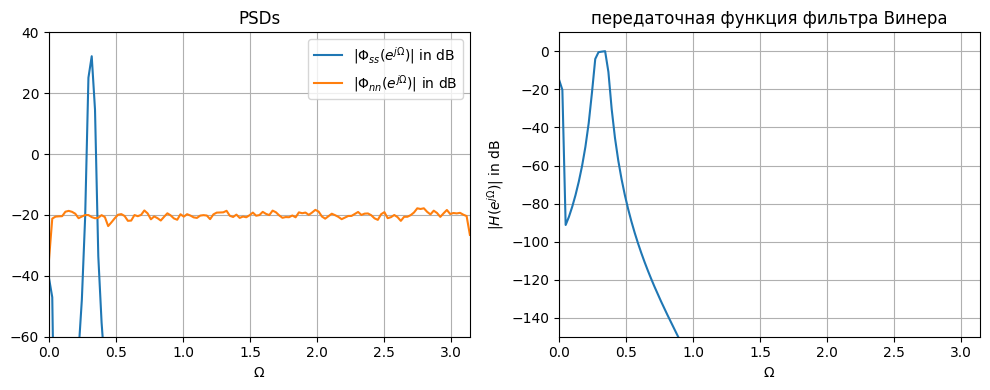

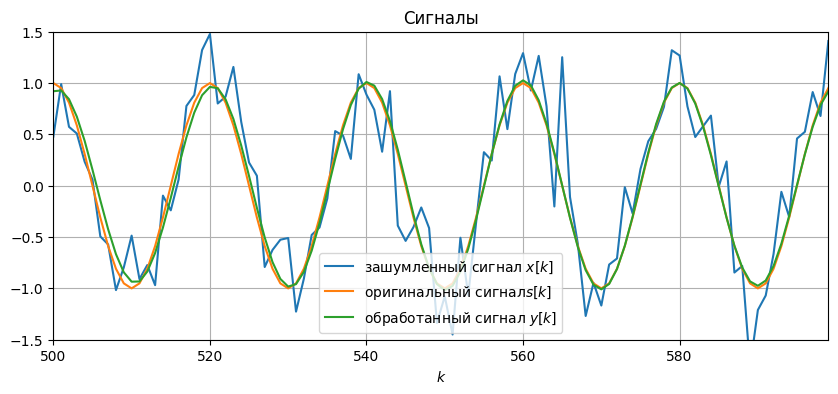

In [ ]:
N = 2**14  #
M = 256  # длина фильтра Виекпв
Om0 = 0.1*np.pi  #частота оригинального сигнала
N0 = .1  # СПМ шума

# оригинальный сигнал
s = np.cos(Om0 * np.arange(N))
# зашумленный сигнал
g = 1/20*np.asarray([1, 2, 3, 4, 5, 4, 3, 2, 1])
np.random.seed(1)
n = np.random.normal(size=N, scale=np.sqrt(N0))
x = np.convolve(s, g, mode='same') + n
# оценки СПМ
f, Pss = sig.csd(s, s, nperseg=M)
f, Pnn = sig.csd(n, n, nperseg=M)
# фильтр Винера
G = np.fft.rfft(g, M)
H = 1/G * (np.abs(G)**2 / (np.abs(G)**2 + N0/Pss))
H = H * np.exp(-1j*2*np.pi/len(H)*np.arange(len(H)) *
               (len(H)//2-8))  # каузальный фильтр
h = np.fft.irfft(H)
# применение фильтра Вмнера
y = np.convolve(x, h, mode='same')

# графики СПМ
Om = np.linspace(0, np.pi, num=len(H))

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(Om, 20*np.log10(np.abs(.5*Pss)),
         label=r'$| \Phi_{ss}(e^{j \Omega}) |$ in dB')
plt.plot(Om, 20*np.log10(np.abs(.5*Pnn)),
         label=r'$| \Phi_{nn}(e^{j \Omega}) |$ in dB')
plt.title('PSDs')
plt.xlabel(r'$\Omega$')
plt.legend()
plt.axis([0, np.pi, -60, 40])
plt.grid()

# передаточная функция фильтра Винера
plt.subplot(122)
plt.plot(Om, 20*np.log10(np.abs(H)))
plt.title('передаточная функция фильтра Винера')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$| H(e^{j \Omega}) |$ in dB')
plt.axis([0, np.pi, -150, 10])
plt.grid()
plt.tight_layout()

# сигналы
idx = np.arange(500, 600)
plt.figure(figsize=(10, 4))
plt.plot(idx, x[idx], label=r'зашумленный сигнал $x[k]$')
plt.plot(idx, s[idx], label=r'оригинальный сигнал$s[k]$')
plt.plot(idx, y[idx], label=r'обработанный сигнал $y[k]$')
plt.title('Сигналы')
plt.xlabel(r'$k$')
plt.axis([idx[0], idx[-1], -1.5, 1.5])
plt.legend()
plt.grid()


Задание 5

 1.Создайте исходный сигнал.

2. Создайте зашумленный сигнал.
3. Создайте классический  фильтр Винера.
4. Обработайте сигналы.
5. Выведите графики.
6. Создайте оптимальный фильтр Винера.
7. Обработайте сигналы и выведите графики.
9. Сравните результаты.


In [ ]:
#1. Исходный сигнал
N = 2**14  #длина сигнала
Om0 = 0.3*np.pi  #частота оригинального сигнала

s = np.cos(Om0 * np.arange(N))

In [ ]:
#2. Создайте зашумленный сигнал.
N0 = .1  # СПМ шума

g = 1/20*np.asarray([1, 2, 3, 4, 5, 4, 3, 2, 1])
np.random.seed(1)
n = np.random.normal(size=N, scale=np.sqrt(N0))
x = np.convolve(s, g, mode='same') + n

In [ ]:
#3. Создайте фильтр винера
M = 256  # длина фильтра

# Оценка СПМ с помощье метода Уэлча
f, Pxx = sig.csd(x, x, nperseg=M)
f, Psx = sig.csd(s, x, nperseg=M)
# фильтр Винера
H = Psx/Pxx
H = H * np.exp(-1j*2*np.pi/len(H)*np.arange(len(H)) *
               (len(H)//2))  # shift for causal filter
h = np.fft.irfft(H)


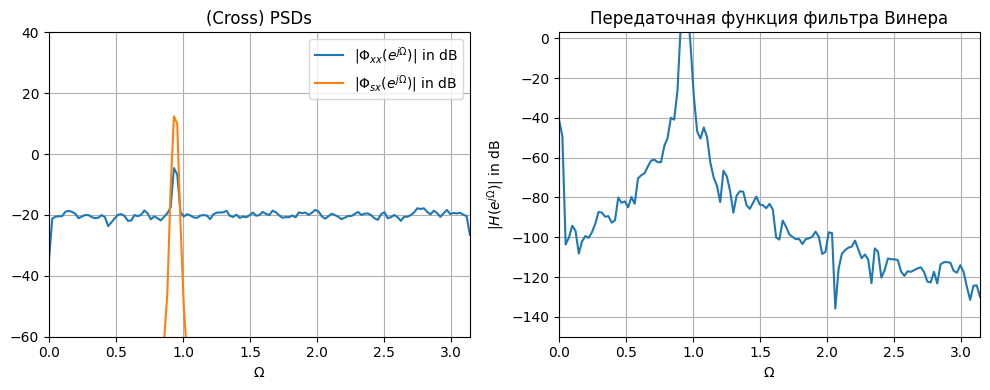

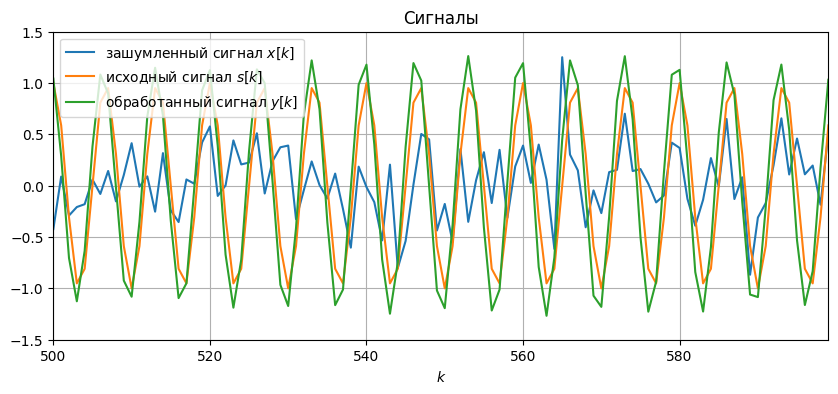

In [ ]:
#4-5. Обработайте сигналы.Выведите графики
# добавление фильтра к оцениваемому сигналу
y = np.convolve(x, h, mode='same')

# построение СПМ
Om = np.linspace(0, np.pi, num=len(H))

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(Om, 20*np.log10(np.abs(.5*Pxx)),
         label=r'$| \Phi_{xx}(e^{j \Omega}) |$ in dB')
plt.plot(Om, 20*np.log10(np.abs(.5*Psx)),
         label=r'$| \Phi_{sx}(e^{j \Omega}) |$ in dB')
plt.title('(Cross) PSDs')
plt.xlabel(r'$\Omega$')
plt.legend()
plt.axis([0, np.pi, -60, 40])
plt.grid()

# передаточная функция фильтра Винера
plt.subplot(122)
plt.plot(Om, 20*np.log10(np.abs(H)))
plt.title('Передаточная функция фильтра Винера')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$| H(e^{j \Omega}) |$ in dB')
plt.axis([0, np.pi, -150, 3])
plt.grid()
plt.tight_layout()

# сигналы
idx = np.arange(500, 600)
plt.figure(figsize=(10, 4))
plt.plot(idx, x[idx], label=r'зашумленный сигнал $x[k]$')
plt.plot(idx, s[idx], label=r'исходный сигнал $s[k]$')
plt.plot(idx, y[idx], label=r'обработанный сигнал $y[k]$')
plt.title('Сигналы')
plt.xlabel(r'$k$')
plt.axis([idx[0], idx[-1], -1.5, 1.5])
plt.legend()
plt.grid()

In [ ]:
# 6. Создайте оптимальный фильтр Винера.
M = 256  # длина фильтра Винера

# оценки СПМ
f, Pss = sig.csd(s, s, nperseg=M)
f, Pnn = sig.csd(n, n, nperseg=M)
# фильтр Винера
G = np.fft.rfft(g, M)
H = 1/G * (np.abs(G)**2 / (np.abs(G)**2 + N0/Pss))
H = H * np.exp(-1j*2*np.pi/len(H)*np.arange(len(H)) *
               (len(H)//2-8))  # каузальный фильтр
h = np.fft.irfft(H)
# применение фильтра Вмнера
y = np.convolve(x, h, mode='same')

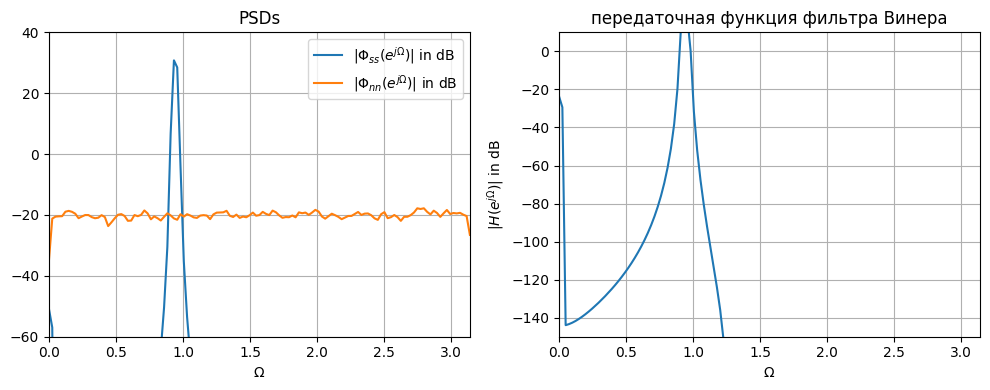

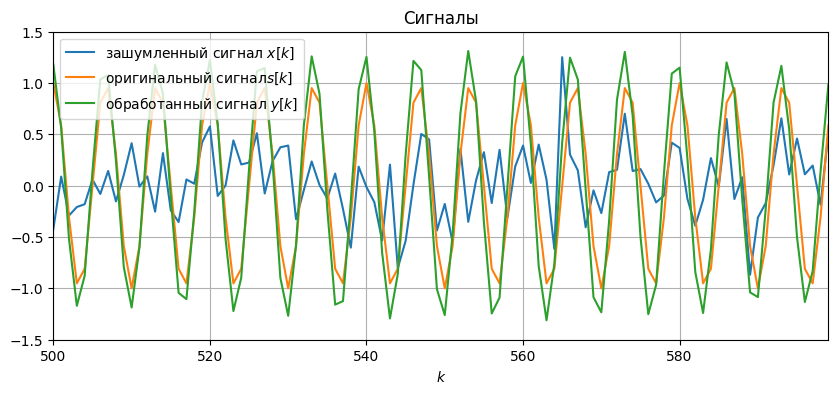

In [ ]:
# 7.Обработайте сигналы и выведите графики.
Om = np.linspace(0, np.pi, num=len(H))

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(Om, 20*np.log10(np.abs(.5*Pss)),
         label=r'$| \Phi_{ss}(e^{j \Omega}) |$ in dB')
plt.plot(Om, 20*np.log10(np.abs(.5*Pnn)),
         label=r'$| \Phi_{nn}(e^{j \Omega}) |$ in dB')
plt.title('PSDs')
plt.xlabel(r'$\Omega$')
plt.legend()
plt.axis([0, np.pi, -60, 40])
plt.grid()

# передаточная функция фильтра Винера
plt.subplot(122)
plt.plot(Om, 20*np.log10(np.abs(H)))
plt.title('передаточная функция фильтра Винера')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$| H(e^{j \Omega}) |$ in dB')
plt.axis([0, np.pi, -150, 10])
plt.grid()
plt.tight_layout()

# сигналы
idx = np.arange(500, 600)
plt.figure(figsize=(10, 4))
plt.plot(idx, x[idx], label=r'зашумленный сигнал $x[k]$')
plt.plot(idx, s[idx], label=r'оригинальный сигнал$s[k]$')
plt.plot(idx, y[idx], label=r'обработанный сигнал $y[k]$')
plt.title('Сигналы')
plt.xlabel(r'$k$')
plt.axis([idx[0], idx[-1], -1.5, 1.5])
plt.legend()
plt.grid()

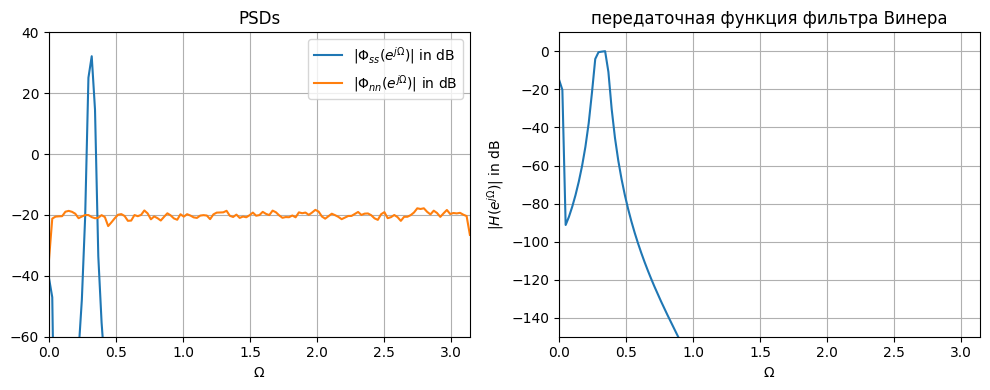

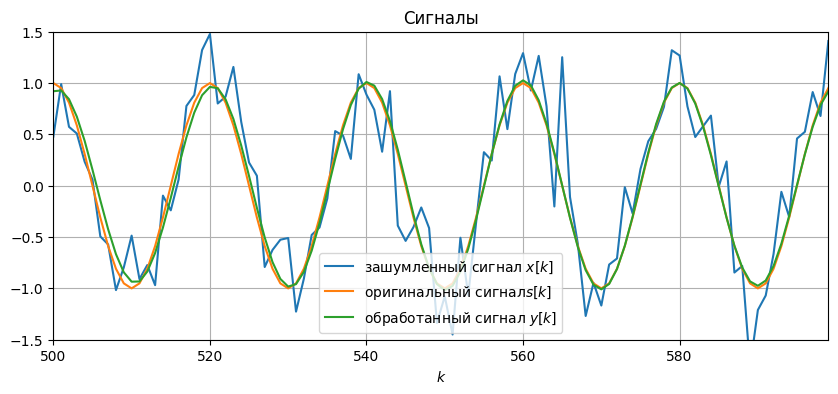

In [ ]:
N = 2**14  #
M = 256  # длина фильтра Виекпв
Om0 = 0.1*np.pi  #частота оригинального сигнала
N0 = .1  # СПМ шума

# оригинальный сигнал
s = np.cos(Om0 * np.arange(N))
# зашумленный сигнал
g = 1/20*np.asarray([1, 2, 3, 4, 5, 4, 3, 2, 1])
np.random.seed(1)
n = np.random.normal(size=N, scale=np.sqrt(N0))
x = np.convolve(s, g, mode='same') + n
# оценки СПМ
f, Pss = sig.csd(s, s, nperseg=M)
f, Pnn = sig.csd(n, n, nperseg=M)
# фильтр Винера
G = np.fft.rfft(g, M)
H = 1/G * (np.abs(G)**2 / (np.abs(G)**2 + N0/Pss))
H = H * np.exp(-1j*2*np.pi/len(H)*np.arange(len(H)) *
               (len(H)//2-8))  # каузальный фильтр
h = np.fft.irfft(H)
# применение фильтра Вмнера
y = np.convolve(x, h, mode='same')

# графики СПМ
Om = np.linspace(0, np.pi, num=len(H))

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(Om, 20*np.log10(np.abs(.5*Pss)),
         label=r'$| \Phi_{ss}(e^{j \Omega}) |$ in dB')
plt.plot(Om, 20*np.log10(np.abs(.5*Pnn)),
         label=r'$| \Phi_{nn}(e^{j \Omega}) |$ in dB')
plt.title('PSDs')
plt.xlabel(r'$\Omega$')
plt.legend()
plt.axis([0, np.pi, -60, 40])
plt.grid()

# передаточная функция фильтра Винера
plt.subplot(122)
plt.plot(Om, 20*np.log10(np.abs(H)))
plt.title('передаточная функция фильтра Винера')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$| H(e^{j \Omega}) |$ in dB')
plt.axis([0, np.pi, -150, 10])
plt.grid()
plt.tight_layout()

# сигналы
idx = np.arange(500, 600)
plt.figure(figsize=(10, 4))
plt.plot(idx, x[idx], label=r'зашумленный сигнал $x[k]$')
plt.plot(idx, s[idx], label=r'оригинальный сигнал$s[k]$')
plt.plot(idx, y[idx], label=r'обработанный сигнал $y[k]$')
plt.title('Сигналы')
plt.xlabel(r'$k$')
plt.axis([idx[0], idx[-1], -1.5, 1.5])
plt.legend()
plt.grid()